In [1]:
# importing necessary lib 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading income data jobs related data 

Income_data= pd.read_excel(r'\Users\vksva\Downloads\fore\ML.Data.2.xlsx',0)
jobs_data = pd.read_excel(r'\Users\vksva\Downloads\fore\ML.Data.2.xlsx',1)

In [3]:
Income_data.head()

Job Type Location Zip  Income  Converted Cancel Reason  \
0  System Diagnostic        92646  759.18        1.0           NaN   
1      Miscellaneous          NaN  479.00        1.0           NaN   
2       XPP Refferal        90605    0.00        1.0           NaN   
3  System Diagnostic        92833  300.00        1.0           NaN   
4    HSP Maintenance        92647  179.40        1.0           NaN   

   Pricebook Price  Price Variation Created Date     Location City  \
0            857.4        -0.114556   2020-06-11  Huntington Beach   
1              0.0              NaN   2019-05-13               NaN   
2              0.0              NaN   2019-07-23          Whittier   
3              0.0              NaN   2019-08-03         Fullerton   
4            359.4        -0.500835   2019-04-01  Huntington Beach   

                Assigned Technicians  Sold Hours     Primary Technician  \
0              George Ramirez - (OC)           0  George Ramirez - (OC)   
1                         DO NOT USE           0             DO NOT USE   
2                        Mark Ocampo           0            Mark Ocampo   
3                Ruben Ramos-57 (OC)           0    Ruben Ramos-57 (OC)   
4  Joel Chavarri (OC)-64, DO NOT USE           0             DO NOT USE   

   Total Technician Paid Time  Total Revenue  
0                    2.000000         759.18  
1                    0.250000         479.00  
2                    2.716667           0.00  
3                    1.983333         300.00  
4                    2.633333         179.40

In [4]:
jobs_data.head()

Year Month      Period  Completed Jobs    Income  Lead Calls  \
0  2018 December  12/31/2018            64.0   96536.0          63   
1   2019 January  01/01/2019             NaN       NaN          14   
2   2019 January  01/02/2019            85.0   81680.5          91   
3   2019 January  01/03/2019            90.0  100885.0          83   
4   2019 January  01/04/2019            85.0   25694.2          89   

   Canceled Jobs  Future Scheduled Jobs  
0           10.0                   57.0  
1            NaN                    9.0  
2           13.0                   97.0  
3            5.0                   95.0  
4            5.0                   94.0

In [5]:
#ranking the dataframe by grouping created date and giving rank based on Income 
# Highest Income 

Income_data["group_rank"] = Income_data.groupby("Created Date")["Income"].rank(ascending=1,method='dense')


In [6]:
Income_data.head()

Job Type Location Zip  Income  Converted Cancel Reason  \
0  System Diagnostic        92646  759.18        1.0           NaN   
1      Miscellaneous          NaN  479.00        1.0           NaN   
2       XPP Refferal        90605    0.00        1.0           NaN   
3  System Diagnostic        92833  300.00        1.0           NaN   
4    HSP Maintenance        92647  179.40        1.0           NaN   

   Pricebook Price  Price Variation Created Date     Location City  \
0            857.4        -0.114556   2020-06-11  Huntington Beach   
1              0.0              NaN   2019-05-13               NaN   
2              0.0              NaN   2019-07-23          Whittier   
3              0.0              NaN   2019-08-03         Fullerton   
4            359.4        -0.500835   2019-04-01  Huntington Beach   

                Assigned Technicians  Sold Hours     Primary Technician  \
0              George Ramirez - (OC)           0  George Ramirez - (OC)   
1                         DO NOT USE           0             DO NOT USE   
2                        Mark Ocampo           0            Mark Ocampo   
3                Ruben Ramos-57 (OC)           0    Ruben Ramos-57 (OC)   
4  Joel Chavarri (OC)-64, DO NOT USE           0             DO NOT USE   

   Total Technician Paid Time  Total Revenue  group_rank  
0                    2.000000         759.18        25.0  
1                    0.250000         479.00        13.0  
2                    2.716667           0.00         1.0  
3                    1.983333         300.00         9.0  
4                    2.633333         179.40         6.0

In [7]:
# sorting the dataframe by Created date 
Income_data=Income_data.sort_values('Created Date')

In [8]:
# max rank of created date 

max_rank=Income_data.groupby('Created Date').group_rank.max()


In [9]:
max_rank

Created Date
2019-01-02    28.0
2019-01-03    22.0
2019-01-04    21.0
2019-01-05    10.0
2019-01-06     5.0
              ... 
2021-02-17    30.0
2021-02-18    29.0
2021-02-19    16.0
2021-02-20    19.0
2021-02-21     5.0
Name: group_rank, Length: 763, dtype: float64

In [10]:
rank=pd.DataFrame(max_rank)
rank_df=rank.add_suffix('').reset_index()
rank_df.head()


Created Date  group_rank
0   2019-01-02        28.0
1   2019-01-03        22.0
2   2019-01-04        21.0
3   2019-01-05        10.0
4   2019-01-06         5.0

In [11]:
rank_df['Created Date'].nunique()

763

In [12]:
# merging rank_df and income_df on created date and group_rank

merged_df= pd.merge(Income_data,rank_df,on=['Created Date','group_rank'])

In [13]:
merged_df.head()

Job Type Location Zip   Income  \
0                        (2)  3 pc Change Outs        92392  17990.0   
1                Furnace Change Out A/C Add On        90003  19749.0   
2               3 pc Change Out W/ Full Reduct        92201  13000.0   
3  Furnace Change Out A/C Add with Full Reduct        92625  16500.0   
4                              3 pc Change Out        92596   7635.0   

   Converted Cancel Reason  Pricebook Price  Price Variation Created Date  \
0        1.0           NaN              0.0              NaN   2019-01-02   
1        1.0           NaN              0.0              NaN   2019-01-03   
2        1.0           NaN              0.0              NaN   2019-01-04   
3        1.0           NaN              0.0              NaN   2019-01-05   
4        1.0           NaN              0.0              NaN   2019-01-06   

    Location City                               Assigned Technicians  \
0     Victorville  Benny Batiz - IE, Javier Leon , Jorge Perez - ...   
1     Los Angeles                                       Tony Santana   
2           Indio  Freddy P, Pablo Aguilar, Omar Ramos-PD/IE, Jua...   
3  Corona Del Mar  Tony Santana, Pedro Gallardo - Lead, Edgar Fig...   
4      Winchester  Ranferi Perez (Ronnie), Jose Alonzo - Lead (Ch...   

   Sold Hours Primary Technician  Total Technician Paid Time  Total Revenue  \
0           0         DO NOT USE                   22.050000        17990.0   
1           0       Tony Santana                    0.000000        19749.0   
2           0           Freddy P                   16.949999        13000.0   
3           0       Tony Santana                  110.566664        16500.0   
4           0   Ernesto Gonzalez                   11.516667         7635.0   

   group_rank  
0        28.0  
1        22.0  
2        21.0  
3        10.0  
4         5.0

In [14]:
merged_df.shape

(776, 15)

In [15]:
jobs_data.head()

Year Month      Period  Completed Jobs    Income  Lead Calls  \
0  2018 December  12/31/2018            64.0   96536.0          63   
1   2019 January  01/01/2019             NaN       NaN          14   
2   2019 January  01/02/2019            85.0   81680.5          91   
3   2019 January  01/03/2019            90.0  100885.0          83   
4   2019 January  01/04/2019            85.0   25694.2          89   

   Canceled Jobs  Future Scheduled Jobs  
0           10.0                   57.0  
1            NaN                    9.0  
2           13.0                   97.0  
3            5.0                   95.0  
4            5.0                   94.0

In [16]:
jobs_data['Created Date']=pd.to_datetime(jobs_data.Period)

In [17]:
jobs_data.head()

Year Month      Period  Completed Jobs    Income  Lead Calls  \
0  2018 December  12/31/2018            64.0   96536.0          63   
1   2019 January  01/01/2019             NaN       NaN          14   
2   2019 January  01/02/2019            85.0   81680.5          91   
3   2019 January  01/03/2019            90.0  100885.0          83   
4   2019 January  01/04/2019            85.0   25694.2          89   

   Canceled Jobs  Future Scheduled Jobs Created Date  
0           10.0                   57.0   2018-12-31  
1            NaN                    9.0   2019-01-01  
2           13.0                   97.0   2019-01-02  
3            5.0                   95.0   2019-01-03  
4            5.0                   94.0   2019-01-04

In [18]:
merged_df=merged_df.drop(['Income','Total Revenue'],axis=1)

In [19]:
merged_df.head()

Job Type Location Zip  Converted  \
0                        (2)  3 pc Change Outs        92392        1.0   
1                Furnace Change Out A/C Add On        90003        1.0   
2               3 pc Change Out W/ Full Reduct        92201        1.0   
3  Furnace Change Out A/C Add with Full Reduct        92625        1.0   
4                              3 pc Change Out        92596        1.0   

  Cancel Reason  Pricebook Price  Price Variation Created Date  \
0           NaN              0.0              NaN   2019-01-02   
1           NaN              0.0              NaN   2019-01-03   
2           NaN              0.0              NaN   2019-01-04   
3           NaN              0.0              NaN   2019-01-05   
4           NaN              0.0              NaN   2019-01-06   

    Location City                               Assigned Technicians  \
0     Victorville  Benny Batiz - IE, Javier Leon , Jorge Perez - ...   
1     Los Angeles                                       Tony Santana   
2           Indio  Freddy P, Pablo Aguilar, Omar Ramos-PD/IE, Jua...   
3  Corona Del Mar  Tony Santana, Pedro Gallardo - Lead, Edgar Fig...   
4      Winchester  Ranferi Perez (Ronnie), Jose Alonzo - Lead (Ch...   

   Sold Hours Primary Technician  Total Technician Paid Time  group_rank  
0           0         DO NOT USE                   22.050000        28.0  
1           0       Tony Santana                    0.000000        22.0  
2           0           Freddy P                   16.949999        21.0  
3           0       Tony Santana                  110.566664        10.0  
4           0   Ernesto Gonzalez                   11.516667         5.0

In [20]:
merge_df_1=pd.merge(merged_df,jobs_data,on='Created Date')

In [21]:
merge_df_1.head()


Job Type Location Zip  Converted  \
0                        (2)  3 pc Change Outs        92392        1.0   
1                Furnace Change Out A/C Add On        90003        1.0   
2               3 pc Change Out W/ Full Reduct        92201        1.0   
3  Furnace Change Out A/C Add with Full Reduct        92625        1.0   
4                              3 pc Change Out        92596        1.0   

  Cancel Reason  Pricebook Price  Price Variation Created Date  \
0           NaN              0.0              NaN   2019-01-02   
1           NaN              0.0              NaN   2019-01-03   
2           NaN              0.0              NaN   2019-01-04   
3           NaN              0.0              NaN   2019-01-05   
4           NaN              0.0              NaN   2019-01-06   

    Location City                               Assigned Technicians  \
0     Victorville  Benny Batiz - IE, Javier Leon , Jorge Perez - ...   
1     Los Angeles                                       Tony Santana   
2           Indio  Freddy P, Pablo Aguilar, Omar Ramos-PD/IE, Jua...   
3  Corona Del Mar  Tony Santana, Pedro Gallardo - Lead, Edgar Fig...   
4      Winchester  Ranferi Perez (Ronnie), Jose Alonzo - Lead (Ch...   

   Sold Hours Primary Technician  Total Technician Paid Time  group_rank  \
0           0         DO NOT USE                   22.050000        28.0   
1           0       Tony Santana                    0.000000        22.0   
2           0           Freddy P                   16.949999        21.0   
3           0       Tony Santana                  110.566664        10.0   
4           0   Ernesto Gonzalez                   11.516667         5.0   

     Year Month      Period  Completed Jobs    Income  Lead Calls  \
0  2019 January  01/02/2019            85.0   81680.5          91   
1  2019 January  01/03/2019            90.0  100885.0          83   
2  2019 January  01/04/2019            85.0   25694.2          89   
3  2019 January  01/05/2019            82.0   92705.0          53   
4  2019 January  01/06/2019            16.0   14062.0          41   

   Canceled Jobs  Future Scheduled Jobs  
0           13.0                   97.0  
1            5.0                   95.0  
2            5.0                   94.0  
3            7.0                   83.0  
4            4.0                   21.0

In [22]:
merge_df_1.shape

(776, 20)

In [23]:
temp_1=pd.read_excel(r'\Users\vksva\Downloads\fore\city_zip_temp.xlsx',0)
temp_2=pd.read_excel(r'\Users\vksva\Downloads\fore\city_zip_temp.xlsx',1)

In [24]:
temp_1.head()

county_name    zip
0  Los Angeles  90001
1  Los Angeles  90002
2  Los Angeles  90003
3  Los Angeles  90004
4  Los Angeles  90005

In [25]:
temp_1['zip'].value_counts()

92551    1
90747    1
92808    1
92807    1
92806    1
        ..
92532    1
91506    1
93553    1
93552    1
90095    1
Name: zip, Length: 447, dtype: int64

In [26]:
temp_1['Location Zip']=temp_1['zip']
temp_1=temp_1.drop(['zip'],axis=1)
temp_1.head()

county_name  Location Zip
0  Los Angeles         90001
1  Los Angeles         90002
2  Los Angeles         90003
3  Los Angeles         90004
4  Los Angeles         90005

In [27]:
temp_1.dtypes

county_name     object
Location Zip     int64
dtype: object

In [28]:
temp_2.head()

NAME       DATE  TMAX  TMIN
0  Los Angeles 2019-01-01    60  43.0
1  Los Angeles 2019-01-02    63  45.0
2  Los Angeles 2019-01-03    68  49.0
3  Los Angeles 2019-01-04    66  51.0
4  Los Angeles 2019-01-05    61  50.0

In [29]:
temp_2['DATE'].value_counts()

2020-08-16    3
2019-03-17    3
2020-07-03    3
2020-11-02    3
2020-12-06    3
             ..
2020-12-07    3
2019-11-28    3
2019-03-25    3
2020-05-15    3
2021-02-20    1
Name: DATE, Length: 782, dtype: int64

In [30]:
merge_df_1['Location Zip']=merge_df_1['Location Zip'].astype(int)

In [31]:
temp_merge_df= pd.merge(merge_df_1,temp_1,on='Location Zip')

In [32]:
temp_merge_df.head()

Job Type  Location Zip  Converted Cancel Reason  \
0   Furnace Change Out A/C Add On         90003        1.0           NaN   
1  3 pc Change Out W/ Full Reduct         92201        1.0           NaN   
2           (2)  3 pc Change Outs         92201        1.0           NaN   
3           (2)  3 pc Change Outs         92201        1.0           NaN   
4                 3 pc Change Out         92201        1.0           NaN   

   Pricebook Price  Price Variation Created Date Location City  \
0              0.0              NaN   2019-01-03   Los Angeles   
1              0.0              NaN   2019-01-04         Indio   
2              0.0              NaN   2019-05-04         Indio   
3            359.4        55.147468   2019-07-30         Indio   
4              0.0              NaN   2019-08-19         Indio   

                                Assigned Technicians  Sold Hours  ...  \
0                                       Tony Santana           0  ...   
1  Freddy P, Pablo Aguilar, Omar Ramos-PD/IE, Jua...           0  ...   
2  Pablo Aguilar, Ernesto Perez (Ernie), Felipe E...           0  ...   
3  Ernesto Perez (Ernie), Omar Ramos-PD/IE, Juan ...           0  ...   
4  Michael Salter , Ernesto Perez (Ernie), Juan R...           0  ...   

  Total Technician Paid Time  group_rank    Year Month      Period  \
0                   0.000000        22.0  2019 January  01/03/2019   
1                  16.949999        21.0  2019 January  01/04/2019   
2                  33.750000        12.0      2019 May  05/04/2019   
3                  23.066667        46.0     2019 July  07/30/2019   
4                  16.416667        24.0   2019 August  08/19/2019   

  Completed Jobs    Income  Lead Calls  Canceled Jobs  Future Scheduled Jobs  \
0           90.0  100885.0          83            5.0                   95.0   
1           85.0   25694.2          89            5.0                   94.0   
2           62.0  167423.4          51            2.0                   63.0   
3          168.0  264673.2         102           23.0                  181.0   
4          116.0  148326.9          64           10.0                  122.0   

   county_name  
0  Los Angeles  
1    Riverside  
2    Riverside  
3    Riverside  
4    Riverside  

[5 rows x 21 columns]

In [33]:
temp_merge_df.shape

(692, 21)

In [34]:
temp_merge_df=temp_merge_df.sort_values('Created Date')

In [35]:
temp_merge_df.head()

Job Type  Location Zip  Converted  \
0                 Furnace Change Out A/C Add On         90003        1.0   
1                3 pc Change Out W/ Full Reduct         92201        1.0   
9   Furnace Change Out A/C Add with Full Reduct         92625        1.0   
10                              3 pc Change Out         92596        1.0   
13                                       Cut In         91352        1.0   

   Cancel Reason  Pricebook Price  Price Variation Created Date  \
0            NaN              0.0              NaN   2019-01-03   
1            NaN              0.0              NaN   2019-01-04   
9            NaN              0.0              NaN   2019-01-05   
10           NaN              0.0              NaN   2019-01-06   
13           NaN              0.0              NaN   2019-01-07   

     Location City                               Assigned Technicians  \
0      Los Angeles                                       Tony Santana   
1            Indio  Freddy P, Pablo Aguilar, Omar Ramos-PD/IE, Jua...   
9   Corona Del Mar  Tony Santana, Pedro Gallardo - Lead, Edgar Fig...   
10      Winchester  Ranferi Perez (Ronnie), Jose Alonzo - Lead (Ch...   
13      Sun Valley  Tony Santana, Cesar Ruvalcaba, Raul Martinez, ...   

    Sold Hours  ... Total Technician Paid Time  group_rank    Year Month  \
0            0  ...                   0.000000        22.0  2019 January   
1            0  ...                  16.949999        21.0  2019 January   
9            0  ...                 110.566664        10.0  2019 January   
10           0  ...                  11.516667         5.0  2019 January   
13           0  ...                 118.533333        28.0  2019 January   

        Period Completed Jobs    Income  Lead Calls  Canceled Jobs  \
0   01/03/2019           90.0  100885.0          83            5.0   
1   01/04/2019           85.0   25694.2          89            5.0   
9   01/05/2019           82.0   92705.0          53            7.0   
10  01/06/2019           16.0   14062.0          41            4.0   
13  01/07/2019           89.0  109814.0          87           13.0   

    Future Scheduled Jobs  county_name  
0                    95.0  Los Angeles  
1                    94.0    Riverside  
9                    83.0       Orange  
10                   21.0    Riverside  
13                   92.0  Los Angeles  

[5 rows x 21 columns]

In [36]:
temp_merge_df.shape

(692, 21)

In [37]:
temp_2.head()

NAME       DATE  TMAX  TMIN
0  Los Angeles 2019-01-01    60  43.0
1  Los Angeles 2019-01-02    63  45.0
2  Los Angeles 2019-01-03    68  49.0
3  Los Angeles 2019-01-04    66  51.0
4  Los Angeles 2019-01-05    61  50.0

In [38]:
temp_2['Created Date']=temp_2['DATE']
temp_2['county_name']=temp_2['NAME']
temp_2=temp_2.drop(['NAME','DATE'],axis=1)
temp_2.head()

TMAX  TMIN Created Date  county_name
0    60  43.0   2019-01-01  Los Angeles
1    63  45.0   2019-01-02  Los Angeles
2    68  49.0   2019-01-03  Los Angeles
3    66  51.0   2019-01-04  Los Angeles
4    61  50.0   2019-01-05  Los Angeles

In [39]:
temp_merge_df_1=pd.merge(temp_merge_df,temp_2,on=['Created Date','county_name'])

In [40]:
temp_merge_df_1.head()

Job Type  Location Zip  Converted  \
0                Furnace Change Out A/C Add On         90003        1.0   
1               3 pc Change Out W/ Full Reduct         92201        1.0   
2  Furnace Change Out A/C Add with Full Reduct         92625        1.0   
3                              3 pc Change Out         92596        1.0   
4                                       Cut In         91352        1.0   

  Cancel Reason  Pricebook Price  Price Variation Created Date  \
0           NaN              0.0              NaN   2019-01-03   
1           NaN              0.0              NaN   2019-01-04   
2           NaN              0.0              NaN   2019-01-05   
3           NaN              0.0              NaN   2019-01-06   
4           NaN              0.0              NaN   2019-01-07   

    Location City                               Assigned Technicians  \
0     Los Angeles                                       Tony Santana   
1           Indio  Freddy P, Pablo Aguilar, Omar Ramos-PD/IE, Jua...   
2  Corona Del Mar  Tony Santana, Pedro Gallardo - Lead, Edgar Fig...   
3      Winchester  Ranferi Perez (Ronnie), Jose Alonzo - Lead (Ch...   
4      Sun Valley  Tony Santana, Cesar Ruvalcaba, Raul Martinez, ...   

   Sold Hours  ...    Year Month      Period  Completed Jobs    Income  \
0           0  ...  2019 January  01/03/2019            90.0  100885.0   
1           0  ...  2019 January  01/04/2019            85.0   25694.2   
2           0  ...  2019 January  01/05/2019            82.0   92705.0   
3           0  ...  2019 January  01/06/2019            16.0   14062.0   
4           0  ...  2019 January  01/07/2019            89.0  109814.0   

  Lead Calls  Canceled Jobs  Future Scheduled Jobs  county_name  TMAX  TMIN  
0         83            5.0                   95.0  Los Angeles    68  49.0  
1         89            5.0                   94.0    Riverside    69  35.0  
2         53            7.0                   83.0       Orange    53  44.0  
3         41            4.0                   21.0    Riverside    58  47.0  
4         87           13.0                   92.0  Los Angeles    60  50.0  

[5 rows x 23 columns]

In [41]:
temp_merge_df_1.shape

(690, 23)

In [42]:
temp_merge_df_1.columns

Index(['Job Type', 'Location Zip', 'Converted', 'Cancel Reason',
       'Pricebook Price', 'Price Variation', 'Created Date', 'Location City',
       'Assigned Technicians', 'Sold Hours', 'Primary Technician',
       'Total Technician Paid Time', 'group_rank', 'Year Month', 'Period',
       'Completed Jobs', 'Income', 'Lead Calls', 'Canceled Jobs',
       'Future Scheduled Jobs', 'county_name', 'TMAX', 'TMIN'],
      dtype='object')

In [43]:
final_df= temp_merge_df_1[['Location Zip', 'Pricebook Price', 'Created Date',
       'Sold Hours', 'Total Technician Paid Time', 'Completed Jobs',
       'Income', 'Lead Calls', 'Canceled Jobs','county_name','TMAX', 'TMIN']]

In [44]:
final_df.head()

Location Zip  Pricebook Price Created Date  Sold Hours  \
0         90003              0.0   2019-01-03           0   
1         92201              0.0   2019-01-04           0   
2         92625              0.0   2019-01-05           0   
3         92596              0.0   2019-01-06           0   
4         91352              0.0   2019-01-07           0   

   Total Technician Paid Time  Completed Jobs    Income  Lead Calls  \
0                    0.000000            90.0  100885.0          83   
1                   16.949999            85.0   25694.2          89   
2                  110.566664            82.0   92705.0          53   
3                   11.516667            16.0   14062.0          41   
4                  118.533333            89.0  109814.0          87   

   Canceled Jobs  county_name  TMAX  TMIN  
0            5.0  Los Angeles    68  49.0  
1            5.0    Riverside    69  35.0  
2            7.0       Orange    53  44.0  
3            4.0    Riverside    58  47.0  
4           13.0  Los Angeles    60  50.0

In [45]:
# decomposing datetime feature

final_df['Created Date']=pd.to_datetime(final_df['Created Date'])
final_df['day']=pd.to_datetime(final_df['Created Date']).dt.day
final_df['month']=pd.to_datetime(final_df['Created Date']).dt.month
final_df['year']=pd.to_datetime(final_df['Created Date']).dt.year



C:\Users\vksva\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\vksva\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\vksva\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [46]:
# zipencoding 
Mean_encoded_subject = final_df.groupby(['Location Zip'])['Income'].mean().to_dict() 
  
final_df['Zip_encode'] =  final_df['Location Zip'].map(Mean_encoded_subject) 

C:\Users\vksva\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [48]:
Mean_encoded_subject

{90003: 100885.0,
 90004: 46013.01333333333,
 90006: 25939.445,
 90008: 115060.87,
 90012: 63786.8,
 90019: 45909.16,
 90025: 154011.2,
 90032: 68103.7,
 90034: 113457.4,
 90035: 29483.7,
 90039: 121328.92,
 90042: 71952.75,
 90043: 73395.0,
 90045: 88504.36,
 90047: 52252.04,
 90048: 68014.91,
 90049: 23933.54,
 90056: 146926.6,
 90059: 188652.92,
 90061: 85786.95,
 90064: 126758.05500000001,
 90065: 95731.35,
 90066: 114742.73,
 90069: 82783.43,
 90077: 108352.46333333333,
 90201: 137099.21000000002,
 90210: 63865.115,
 90211: 71845.09,
 90212: 87222.2,
 90220: 87915.71333333333,
 90221: 142237.80000000002,
 90222: 107784.39,
 90230: 117729.0,
 90240: 84356.17,
 90241: 128998.8,
 90242: 52592.07,
 90245: 46262.015,
 90247: 130172.56,
 90248: 76824.0,
 90249: 124759.405,
 90250: 32850.8,
 90254: 37626.0,
 90260: 84925.7,
 90262: 122574.406,
 90265: 48809.52666666667,
 90266: 117841.51666666668,
 90272: 104283.6,
 90274: 105840.82666666666,
 90275: 126101.45499999999,
 90277: 279776.85

In [49]:
final_df.head()

Location Zip  Pricebook Price Created Date  Sold Hours  \
0         90003              0.0   2019-01-03           0   
1         92201              0.0   2019-01-04           0   
2         92625              0.0   2019-01-05           0   
3         92596              0.0   2019-01-06           0   
4         91352              0.0   2019-01-07           0   

   Total Technician Paid Time  Completed Jobs    Income  Lead Calls  \
0                    0.000000            90.0  100885.0          83   
1                   16.949999            85.0   25694.2          89   
2                  110.566664            82.0   92705.0          53   
3                   11.516667            16.0   14062.0          41   
4                  118.533333            89.0  109814.0          87   

   Canceled Jobs  county_name  TMAX  TMIN  day  month  year     Zip_encode  
0            5.0  Los Angeles    68  49.0    3      1  2019  100885.000000  
1            5.0    Riverside    69  35.0    4      1  2019  106747.777500  
2            7.0       Orange    53  44.0    5      1  2019   92705.000000  
3            4.0    Riverside    58  47.0    6      1  2019   41483.776667  
4           13.0  Los Angeles    60  50.0    7      1  2019  105166.175000

In [50]:
final_df.head()

Location Zip  Pricebook Price Created Date  Sold Hours  \
0         90003              0.0   2019-01-03           0   
1         92201              0.0   2019-01-04           0   
2         92625              0.0   2019-01-05           0   
3         92596              0.0   2019-01-06           0   
4         91352              0.0   2019-01-07           0   

   Total Technician Paid Time  Completed Jobs    Income  Lead Calls  \
0                    0.000000            90.0  100885.0          83   
1                   16.949999            85.0   25694.2          89   
2                  110.566664            82.0   92705.0          53   
3                   11.516667            16.0   14062.0          41   
4                  118.533333            89.0  109814.0          87   

   Canceled Jobs  county_name  TMAX  TMIN  day  month  year     Zip_encode  
0            5.0  Los Angeles    68  49.0    3      1  2019  100885.000000  
1            5.0    Riverside    69  35.0    4      1  2019  106747.777500  
2            7.0       Orange    53  44.0    5      1  2019   92705.000000  
3            4.0    Riverside    58  47.0    6      1  2019   41483.776667  
4           13.0  Los Angeles    60  50.0    7      1  2019  105166.175000

In [51]:
#county name encoding 

final_df['county_name']=pd.get_dummies(final_df['county_name'],drop_first=True)

C:\Users\vksva\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [52]:
final_df.head()

Location Zip  Pricebook Price Created Date  Sold Hours  \
0         90003              0.0   2019-01-03           0   
1         92201              0.0   2019-01-04           0   
2         92625              0.0   2019-01-05           0   
3         92596              0.0   2019-01-06           0   
4         91352              0.0   2019-01-07           0   

   Total Technician Paid Time  Completed Jobs    Income  Lead Calls  \
0                    0.000000            90.0  100885.0          83   
1                   16.949999            85.0   25694.2          89   
2                  110.566664            82.0   92705.0          53   
3                   11.516667            16.0   14062.0          41   
4                  118.533333            89.0  109814.0          87   

   Canceled Jobs  county_name  TMAX  TMIN  day  month  year     Zip_encode  
0            5.0            0    68  49.0    3      1  2019  100885.000000  
1            5.0            0    69  35.0    4      1  2019  106747.777500  
2            7.0            1    53  44.0    5      1  2019   92705.000000  
3            4.0            0    58  47.0    6      1  2019   41483.776667  
4           13.0            0    60  50.0    7      1  2019  105166.175000

In [53]:
final_df=final_df.drop(['Location Zip','Created Date'],axis=1)

In [54]:
final_df.head()

Pricebook Price  Sold Hours  Total Technician Paid Time  Completed Jobs  \
0              0.0           0                    0.000000            90.0   
1              0.0           0                   16.949999            85.0   
2              0.0           0                  110.566664            82.0   
3              0.0           0                   11.516667            16.0   
4              0.0           0                  118.533333            89.0   

     Income  Lead Calls  Canceled Jobs  county_name  TMAX  TMIN  day  month  \
0  100885.0          83            5.0            0    68  49.0    3      1   
1   25694.2          89            5.0            0    69  35.0    4      1   
2   92705.0          53            7.0            1    53  44.0    5      1   
3   14062.0          41            4.0            0    58  47.0    6      1   
4  109814.0          87           13.0            0    60  50.0    7      1   

   year     Zip_encode  
0  2019  100885.000000  
1  2019  106747.777500  
2  2019   92705.000000  
3  2019   41483.776667  
4  2019  105166.175000

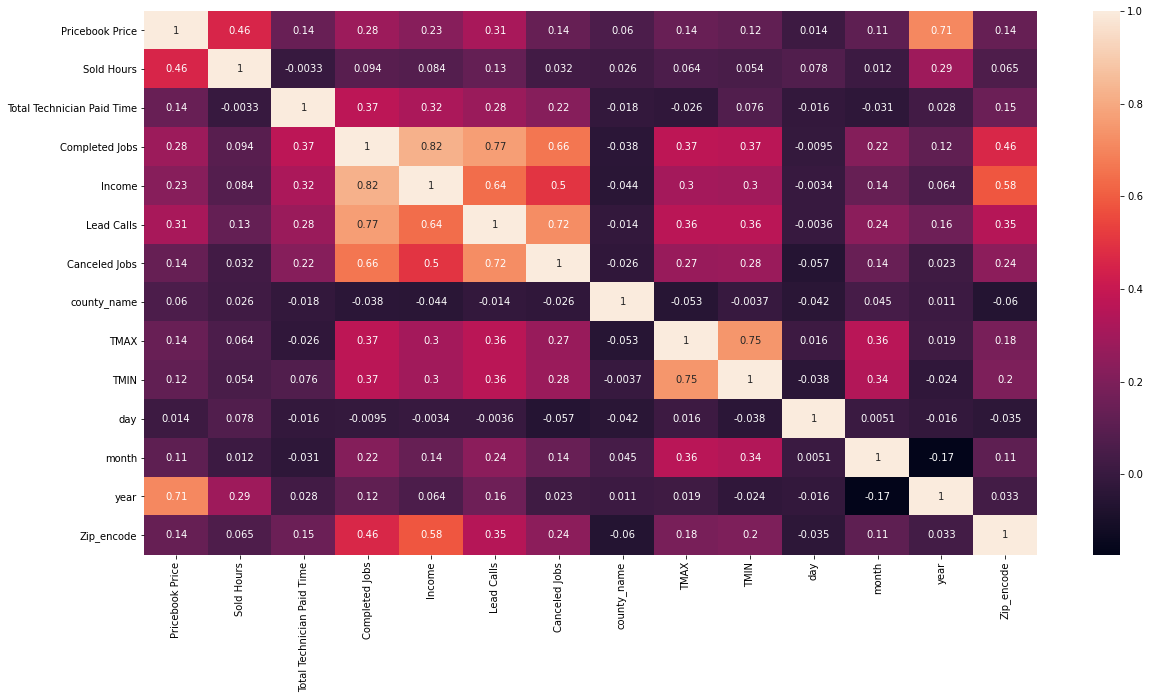

In [55]:
plt.figure(figsize=(20,10))
sns.heatmap(final_df.corr(method='spearman'),annot=True)
plt.show()

In [56]:
final_df.isnull().sum()

Pricebook Price                0
Sold Hours                     0
Total Technician Paid Time     0
Completed Jobs                 3
Income                         3
Lead Calls                     0
Canceled Jobs                 21
county_name                    0
TMAX                           0
TMIN                           0
day                            0
month                          0
year                           0
Zip_encode                     0
dtype: int64

In [57]:
final_df.shape

(690, 14)

In [58]:
train = final_df[0:600]
cv= final_df[600:650]
test= final_df[650:]

In [59]:
train.head()

Pricebook Price  Sold Hours  Total Technician Paid Time  Completed Jobs  \
0              0.0           0                    0.000000            90.0   
1              0.0           0                   16.949999            85.0   
2              0.0           0                  110.566664            82.0   
3              0.0           0                   11.516667            16.0   
4              0.0           0                  118.533333            89.0   

     Income  Lead Calls  Canceled Jobs  county_name  TMAX  TMIN  day  month  \
0  100885.0          83            5.0            0    68  49.0    3      1   
1   25694.2          89            5.0            0    69  35.0    4      1   
2   92705.0          53            7.0            1    53  44.0    5      1   
3   14062.0          41            4.0            0    58  47.0    6      1   
4  109814.0          87           13.0            0    60  50.0    7      1   

   year     Zip_encode  
0  2019  100885.000000  
1  2019  106747.777500  
2  2019   92705.000000  
3  2019   41483.776667  
4  2019  105166.175000

In [60]:
y_train=train['Income']
X_train=train.drop(['Income'],axis=1)

In [61]:
X_train.isnull().sum()

Pricebook Price                0
Sold Hours                     0
Total Technician Paid Time     0
Completed Jobs                 2
Lead Calls                     0
Canceled Jobs                 20
county_name                    0
TMAX                           0
TMIN                           0
day                            0
month                          0
year                           0
Zip_encode                     0
dtype: int64

In [62]:
X_train['Canceled Jobs'].median()

7.0

In [63]:
# filling nullvalues
X_train['Canceled Jobs']=X_train['Canceled Jobs'].fillna(7)

In [64]:
X_train['Completed Jobs'].median()

84.0

In [65]:
X_train['Completed Jobs']=X_train['Completed Jobs'].fillna(84.0)

In [66]:
X_train.dtypes

Pricebook Price               float64
Sold Hours                      int64
Total Technician Paid Time    float64
Completed Jobs                float64
Lead Calls                      int64
Canceled Jobs                 float64
county_name                     uint8
TMAX                            int64
TMIN                          float64
day                             int64
month                           int64
year                            int64
Zip_encode                    float64
dtype: object

In [67]:
y_train.isnull().sum()

2

In [68]:
y_train.median()

80604.2

In [69]:
y_train=y_train.fillna(80604.2)

In [70]:
import xgboost as xgb
xgbst_reg=xgb.XGBRegressor()


In [71]:
xgbst_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [72]:
xgbst_reg.score(X_train,y_train)

0.999953637564784

In [73]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(xgbst_reg,X_train,y_train,cv=5)

In [74]:
score.mean()

0.41484015245208816

In [75]:
from sklearn.ensemble import ExtraTreesRegressor
reg= ExtraTreesRegressor()
reg.fit(X_train,y_train)


ExtraTreesRegressor()

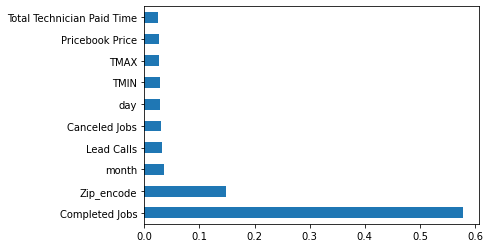

In [76]:
feat_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [77]:
xgbst_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
xgbst_reg.score(X_train,y_train)

0.999953637564784

In [79]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(xgbst_reg,X_train,y_train,cv=5)

In [80]:
score.mean()

0.41484015245208816

In [81]:
y_cv=cv['Income']
X_cv=cv.drop(['Income'],axis=1)

In [82]:
X_train.columns

Index(['Pricebook Price', 'Sold Hours', 'Total Technician Paid Time',
       'Completed Jobs', 'Lead Calls', 'Canceled Jobs', 'county_name', 'TMAX',
       'TMIN', 'day', 'month', 'year', 'Zip_encode'],
      dtype='object')

In [83]:
X_cv.columns

Index(['Pricebook Price', 'Sold Hours', 'Total Technician Paid Time',
       'Completed Jobs', 'Lead Calls', 'Canceled Jobs', 'county_name', 'TMAX',
       'TMIN', 'day', 'month', 'year', 'Zip_encode'],
      dtype='object')

In [84]:
X_cv.isnull().sum()

Pricebook Price               0
Sold Hours                    0
Total Technician Paid Time    0
Completed Jobs                1
Lead Calls                    0
Canceled Jobs                 1
county_name                   0
TMAX                          0
TMIN                          0
day                           0
month                         0
year                          0
Zip_encode                    0
dtype: int64

In [85]:
print(X_cv['Completed Jobs'].median())
print(X_cv['Canceled Jobs'].median())


108.0
8.0


In [86]:
X_cv['Completed Jobs']=X_cv['Completed Jobs'].fillna(108.0)

In [87]:
X_cv['Canceled Jobs']=X_cv['Canceled Jobs'].fillna(8.0)

In [88]:
y_cv.isnull().sum()

1

In [89]:
y_cv.median()

83864.72

In [90]:
y_cv=y_cv.fillna(83864.72)

In [91]:
xgbst_reg.score(X_cv,y_cv)

0.5915129567799836

In [92]:
y_test=test['Income']
X_test=test.drop(['Income'],axis=1)

In [93]:
X_test.isnull().sum()

Pricebook Price               0
Sold Hours                    0
Total Technician Paid Time    0
Completed Jobs                0
Lead Calls                    0
Canceled Jobs                 0
county_name                   0
TMAX                          0
TMIN                          0
day                           0
month                         0
year                          0
Zip_encode                    0
dtype: int64

In [94]:
X_test['Completed Jobs'].median()

106.5

In [95]:
X_test['Completed Jobs']=X_test['Completed Jobs'].fillna(107.0)

In [96]:
y_test.isnull().sum()

0

In [97]:
y_test.median()

67757.76000000001

In [98]:
y_test=y_test.fillna(76878.35)

In [99]:
xgbst_reg.score(X_test,y_test)

-0.5282271754747996

In [100]:
best_model= xgb.XGBRegressor(learning_rate=0.01,max_depth=36,min_child_weight=9,n_estimators=357,subsample=0.6)

In [101]:
best_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=36,
             min_child_weight=9, missing=nan, monotone_constraints='()',
             n_estimators=357, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [101]:
best_model.score(X_train,y_train)

0.8846552212828434

In [102]:
best_model.score(X_cv,y_cv)

0.7126540046074255

In [103]:
predict_cv= best_model.predict(X_cv)

In [104]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_cv, predict_cv))
print('MSE:', metrics.mean_squared_error(y_cv, predict_cv))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_cv, predict_cv)))

MAE: 20102.508513476558
MSE: 744037961.6318889
RMSE: 27277.059255570217


In [105]:
metrics.median_absolute_error(y_cv,predict_cv)

14898.936718749996

In [106]:
best_model.score(X_test,y_test)

-0.03196723954082481

In [107]:
predict_cv= best_model.predict(X_test)

In [108]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predict_cv))
print('MSE:', metrics.mean_squared_error(y_test, predict_cv))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict_cv)))

MAE: 33193.031997680664
MSE: 1782229600.9311821
RMSE: 42216.46125542952


In [109]:
metrics.median_absolute_error(y_test,predict_cv)

27469.776874999996

In [108]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint


parameters = {'n_estimators': randint(100,1200),
               'learning_rate': [0.001,0.002,0.003,0.005,0.01,0.04,0.05,0.1,0.2,0.3,0.4,0.5,0.6],
               'max_depth': randint(5,40),
               'subsample': [0.5,0.6,0.7,0.8],
               'min_child_weight': randint(1,10)  }

In [188]:
base_learner=xgb.XGBRegressor()
tuned_model= RandomizedSearchCV(estimator = base_learner, param_distributions = parameters,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=0)

In [213]:
tuned_model.fit(X_1,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] learning_rate=0.6, max_depth=5, min_child_weight=4, n_estimators=863, subsample=0.8 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.6, max_depth=5, min_child_weight=4, n_estimators=863, subsample=0.8, total=   1.3s
[CV] learning_rate=0.6, max_depth=5, min_child_weight=4, n_estimators=863, subsample=0.8 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  learning_rate=0.6, max_depth=5, min_child_weight=4, n_estimators=863, subsample=0.8, total=   1.2s
[CV] learning_rate=0.6, max_depth=5, min_child_weight=4, n_estimators=863, subsample=0.8 
[CV]  learning_rate=0.6, max_depth=5, min_child_weight=4, n_estimators=863, subsample=0.8, total=   1.3s
[CV] learning_rate=0.6, max_depth=5, min_child_weight=4, n_estimators=863, subsample=0.8 
[CV]  learning_rate=0.6, max_depth=5, min_child_weight=4, n_estimators=863, subsample=0.8, total=   1.0s
[CV] learning_rate=0.6, max_depth=5, min_child_weight=4, n_estimators=863, subsample=0.8 
[CV]  learning_rate=0.6, max_depth=5, min_child_weight=4, n_estimators=863, subsample=0.8, total=   1.0s
[CV] learning_rate=0.1, max_depth=14, min_child_weight=4, n_estimators=377, subsample=0.7 
[CV]  learning_rate=0.1, max_depth=14, min_child_weight=4, n_estimators=377, subsample=0.7, total=   0.9s
[CV] learning_rate=0.1, max_depth=14, min_child_weight=4, n_estimators=377, subsample=0.7 
[CV]  learning_rate=0.

[CV]  learning_rate=0.001, max_depth=6, min_child_weight=1, n_estimators=643, subsample=0.7, total=   1.0s
[CV] learning_rate=0.001, max_depth=6, min_child_weight=1, n_estimators=643, subsample=0.7 
[CV]  learning_rate=0.001, max_depth=6, min_child_weight=1, n_estimators=643, subsample=0.7, total=   1.0s
[CV] learning_rate=0.01, max_depth=28, min_child_weight=4, n_estimators=610, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=28, min_child_weight=4, n_estimators=610, subsample=0.8, total=   1.7s
[CV] learning_rate=0.01, max_depth=28, min_child_weight=4, n_estimators=610, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=28, min_child_weight=4, n_estimators=610, subsample=0.8, total=   1.7s
[CV] learning_rate=0.01, max_depth=28, min_child_weight=4, n_estimators=610, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=28, min_child_weight=4, n_estimators=610, subsample=0.8, total=   1.7s
[CV] learning_rate=0.01, max_depth=28, min_child_weight=4, n_estimators=610, subsample=0.8 
[CV] 

[CV]  learning_rate=0.04, max_depth=26, min_child_weight=1, n_estimators=269, subsample=0.8, total=   1.4s
[CV] learning_rate=0.04, max_depth=26, min_child_weight=1, n_estimators=269, subsample=0.8 
[CV]  learning_rate=0.04, max_depth=26, min_child_weight=1, n_estimators=269, subsample=0.8, total=   1.5s
[CV] learning_rate=0.04, max_depth=26, min_child_weight=1, n_estimators=269, subsample=0.8 
[CV]  learning_rate=0.04, max_depth=26, min_child_weight=1, n_estimators=269, subsample=0.8, total=   1.5s
[CV] learning_rate=0.04, max_depth=26, min_child_weight=1, n_estimators=269, subsample=0.8 
[CV]  learning_rate=0.04, max_depth=26, min_child_weight=1, n_estimators=269, subsample=0.8, total=   1.5s
[CV] learning_rate=0.04, max_depth=26, min_child_weight=1, n_estimators=269, subsample=0.8 
[CV]  learning_rate=0.04, max_depth=26, min_child_weight=1, n_estimators=269, subsample=0.8, total=   1.5s
[CV] learning_rate=0.001, max_depth=36, min_child_weight=6, n_estimators=356, subsample=0.6 
[CV]

[CV]  learning_rate=0.05, max_depth=16, min_child_weight=3, n_estimators=407, subsample=0.5, total=   1.0s
[CV] learning_rate=0.05, max_depth=16, min_child_weight=3, n_estimators=407, subsample=0.5 
[CV]  learning_rate=0.05, max_depth=16, min_child_weight=3, n_estimators=407, subsample=0.5, total=   1.1s
[CV] learning_rate=0.05, max_depth=16, min_child_weight=3, n_estimators=407, subsample=0.5 
[CV]  learning_rate=0.05, max_depth=16, min_child_weight=3, n_estimators=407, subsample=0.5, total=   1.1s
[CV] learning_rate=0.001, max_depth=5, min_child_weight=7, n_estimators=375, subsample=0.7 
[CV]  learning_rate=0.001, max_depth=5, min_child_weight=7, n_estimators=375, subsample=0.7, total=   0.5s
[CV] learning_rate=0.001, max_depth=5, min_child_weight=7, n_estimators=375, subsample=0.7 
[CV]  learning_rate=0.001, max_depth=5, min_child_weight=7, n_estimators=375, subsample=0.7, total=   0.5s
[CV] learning_rate=0.001, max_depth=5, min_child_weight=7, n_estimators=375, subsample=0.7 
[CV] 

[CV]  learning_rate=0.001, max_depth=11, min_child_weight=6, n_estimators=387, subsample=0.6, total=   0.6s
[CV] learning_rate=0.1, max_depth=29, min_child_weight=3, n_estimators=307, subsample=0.8 
[CV]  learning_rate=0.1, max_depth=29, min_child_weight=3, n_estimators=307, subsample=0.8, total=   1.7s
[CV] learning_rate=0.1, max_depth=29, min_child_weight=3, n_estimators=307, subsample=0.8 
[CV]  learning_rate=0.1, max_depth=29, min_child_weight=3, n_estimators=307, subsample=0.8, total=   2.0s
[CV] learning_rate=0.1, max_depth=29, min_child_weight=3, n_estimators=307, subsample=0.8 
[CV]  learning_rate=0.1, max_depth=29, min_child_weight=3, n_estimators=307, subsample=0.8, total=   1.3s
[CV] learning_rate=0.1, max_depth=29, min_child_weight=3, n_estimators=307, subsample=0.8 
[CV]  learning_rate=0.1, max_depth=29, min_child_weight=3, n_estimators=307, subsample=0.8, total=   1.1s
[CV] learning_rate=0.1, max_depth=29, min_child_weight=3, n_estimators=307, subsample=0.8 
[CV]  learnin

[CV]  learning_rate=0.3, max_depth=14, min_child_weight=8, n_estimators=830, subsample=0.7, total=   1.7s
[CV] learning_rate=0.3, max_depth=14, min_child_weight=8, n_estimators=830, subsample=0.7 
[CV]  learning_rate=0.3, max_depth=14, min_child_weight=8, n_estimators=830, subsample=0.7, total=   1.5s
[CV] learning_rate=0.3, max_depth=14, min_child_weight=8, n_estimators=830, subsample=0.7 
[CV]  learning_rate=0.3, max_depth=14, min_child_weight=8, n_estimators=830, subsample=0.7, total=   1.5s
[CV] learning_rate=0.3, max_depth=14, min_child_weight=8, n_estimators=830, subsample=0.7 
[CV]  learning_rate=0.3, max_depth=14, min_child_weight=8, n_estimators=830, subsample=0.7, total=   1.5s
[CV] learning_rate=0.6, max_depth=8, min_child_weight=8, n_estimators=1185, subsample=0.6 
[CV]  learning_rate=0.6, max_depth=8, min_child_weight=8, n_estimators=1185, subsample=0.6, total=   1.5s
[CV] learning_rate=0.6, max_depth=8, min_child_weight=8, n_estimators=1185, subsample=0.6 
[CV]  learning_

[CV]  learning_rate=0.01, max_depth=7, min_child_weight=6, n_estimators=1008, subsample=0.5, total=   1.2s
[CV] learning_rate=0.01, max_depth=7, min_child_weight=6, n_estimators=1008, subsample=0.5 
[CV]  learning_rate=0.01, max_depth=7, min_child_weight=6, n_estimators=1008, subsample=0.5, total=   1.2s
[CV] learning_rate=0.04, max_depth=7, min_child_weight=6, n_estimators=523, subsample=0.8 
[CV]  learning_rate=0.04, max_depth=7, min_child_weight=6, n_estimators=523, subsample=0.8, total=   0.8s
[CV] learning_rate=0.04, max_depth=7, min_child_weight=6, n_estimators=523, subsample=0.8 
[CV]  learning_rate=0.04, max_depth=7, min_child_weight=6, n_estimators=523, subsample=0.8, total=   0.7s
[CV] learning_rate=0.04, max_depth=7, min_child_weight=6, n_estimators=523, subsample=0.8 
[CV]  learning_rate=0.04, max_depth=7, min_child_weight=6, n_estimators=523, subsample=0.8, total=   0.8s
[CV] learning_rate=0.04, max_depth=7, min_child_weight=6, n_estimators=523, subsample=0.8 
[CV]  learni

[CV]  learning_rate=0.2, max_depth=12, min_child_weight=8, n_estimators=1137, subsample=0.7, total=   1.9s
[CV] learning_rate=0.2, max_depth=12, min_child_weight=8, n_estimators=1137, subsample=0.7 
[CV]  learning_rate=0.2, max_depth=12, min_child_weight=8, n_estimators=1137, subsample=0.7, total=   1.9s
[CV] learning_rate=0.2, max_depth=12, min_child_weight=8, n_estimators=1137, subsample=0.7 
[CV]  learning_rate=0.2, max_depth=12, min_child_weight=8, n_estimators=1137, subsample=0.7, total=   1.8s
[CV] learning_rate=0.2, max_depth=12, min_child_weight=8, n_estimators=1137, subsample=0.7 
[CV]  learning_rate=0.2, max_depth=12, min_child_weight=8, n_estimators=1137, subsample=0.7, total=   1.8s
[CV] learning_rate=0.2, max_depth=12, min_child_weight=8, n_estimators=1137, subsample=0.7 
[CV]  learning_rate=0.2, max_depth=12, min_child_weight=8, n_estimators=1137, subsample=0.7, total=   1.9s
[CV] learning_rate=0.002, max_depth=5, min_child_weight=5, n_estimators=381, subsample=0.5 
[CV] 

[CV]  learning_rate=0.4, max_depth=35, min_child_weight=1, n_estimators=263, subsample=0.7, total=   1.2s
[CV] learning_rate=0.4, max_depth=35, min_child_weight=1, n_estimators=263, subsample=0.7 
[CV]  learning_rate=0.4, max_depth=35, min_child_weight=1, n_estimators=263, subsample=0.7, total=   1.2s
[CV] learning_rate=0.4, max_depth=35, min_child_weight=1, n_estimators=263, subsample=0.7 
[CV]  learning_rate=0.4, max_depth=35, min_child_weight=1, n_estimators=263, subsample=0.7, total=   1.2s
[CV] learning_rate=0.002, max_depth=14, min_child_weight=7, n_estimators=650, subsample=0.8 
[CV]  learning_rate=0.002, max_depth=14, min_child_weight=7, n_estimators=650, subsample=0.8, total=   1.0s
[CV] learning_rate=0.002, max_depth=14, min_child_weight=7, n_estimators=650, subsample=0.8 
[CV]  learning_rate=0.002, max_depth=14, min_child_weight=7, n_estimators=650, subsample=0.8, total=   1.0s
[CV] learning_rate=0.002, max_depth=14, min_child_weight=7, n_estimators=650, subsample=0.8 
[CV] 

[CV]  learning_rate=0.05, max_depth=12, min_child_weight=2, n_estimators=237, subsample=0.7, total=   0.7s
[CV] learning_rate=0.001, max_depth=24, min_child_weight=9, n_estimators=1032, subsample=0.6 
[CV]  learning_rate=0.001, max_depth=24, min_child_weight=9, n_estimators=1032, subsample=0.6, total=   1.3s
[CV] learning_rate=0.001, max_depth=24, min_child_weight=9, n_estimators=1032, subsample=0.6 
[CV]  learning_rate=0.001, max_depth=24, min_child_weight=9, n_estimators=1032, subsample=0.6, total=   1.2s
[CV] learning_rate=0.001, max_depth=24, min_child_weight=9, n_estimators=1032, subsample=0.6 
[CV]  learning_rate=0.001, max_depth=24, min_child_weight=9, n_estimators=1032, subsample=0.6, total=   1.1s
[CV] learning_rate=0.001, max_depth=24, min_child_weight=9, n_estimators=1032, subsample=0.6 
[CV]  learning_rate=0.001, max_depth=24, min_child_weight=9, n_estimators=1032, subsample=0.6, total=   1.2s
[CV] learning_rate=0.001, max_depth=24, min_child_weight=9, n_estimators=1032, su

[CV]  learning_rate=0.3, max_depth=38, min_child_weight=5, n_estimators=126, subsample=0.5, total=   0.3s
[CV] learning_rate=0.3, max_depth=38, min_child_weight=5, n_estimators=126, subsample=0.5 
[CV]  learning_rate=0.3, max_depth=38, min_child_weight=5, n_estimators=126, subsample=0.5, total=   0.3s
[CV] learning_rate=0.3, max_depth=38, min_child_weight=5, n_estimators=126, subsample=0.5 
[CV]  learning_rate=0.3, max_depth=38, min_child_weight=5, n_estimators=126, subsample=0.5, total=   0.3s
[CV] learning_rate=0.3, max_depth=38, min_child_weight=5, n_estimators=126, subsample=0.5 
[CV]  learning_rate=0.3, max_depth=38, min_child_weight=5, n_estimators=126, subsample=0.5, total=   0.3s
[CV] learning_rate=0.2, max_depth=14, min_child_weight=6, n_estimators=297, subsample=0.6 
[CV]  learning_rate=0.2, max_depth=14, min_child_weight=6, n_estimators=297, subsample=0.6, total=   0.6s
[CV] learning_rate=0.2, max_depth=14, min_child_weight=6, n_estimators=297, subsample=0.6 
[CV]  learning_

[CV]  learning_rate=0.001, max_depth=11, min_child_weight=2, n_estimators=528, subsample=0.8, total=   1.0s
[CV] learning_rate=0.001, max_depth=11, min_child_weight=2, n_estimators=528, subsample=0.8 
[CV]  learning_rate=0.001, max_depth=11, min_child_weight=2, n_estimators=528, subsample=0.8, total=   1.1s
[CV] learning_rate=0.3, max_depth=9, min_child_weight=2, n_estimators=519, subsample=0.7 
[CV]  learning_rate=0.3, max_depth=9, min_child_weight=2, n_estimators=519, subsample=0.7, total=   1.0s
[CV] learning_rate=0.3, max_depth=9, min_child_weight=2, n_estimators=519, subsample=0.7 
[CV]  learning_rate=0.3, max_depth=9, min_child_weight=2, n_estimators=519, subsample=0.7, total=   1.1s
[CV] learning_rate=0.3, max_depth=9, min_child_weight=2, n_estimators=519, subsample=0.7 
[CV]  learning_rate=0.3, max_depth=9, min_child_weight=2, n_estimators=519, subsample=0.7, total=   1.1s
[CV] learning_rate=0.3, max_depth=9, min_child_weight=2, n_estimators=519, subsample=0.7 
[CV]  learning_r

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 11.6min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021947839240>,
                                        'min_child_weight': <

In [214]:
tuned_model.best_params_

{'learning_rate': 0.01,
 'max_depth': 36,
 'min_child_weight': 9,
 'n_estimators': 357,
 'subsample': 0.6}

In [173]:
X_test.head()

Pricebook Price  Sold Hours  Total Technician Paid Time  Completed Jobs  \
650          31975.0           0                  124.716667            96.0   
651          27860.0           0                   70.233333           120.0   
652           5995.0           0                   15.866667            47.0   
653           6495.0           0                   29.783333            47.0   
654           2273.4           0                    1.733333            11.0   

     Lead Calls  Canceled Jobs  county_name  TMAX  TMIN  day  month  year  \
650          66            7.0            1    71  59.0    7      1  2021   
651          72            8.0            0    73  43.0    8      1  2021   
652          51            6.0            1    66  54.0    9      1  2021   
653          51            6.0            0    74  53.0    9      1  2021   
654          22            2.0            0    71  44.0   10      1  2021   

       Zip_encode  
650  92378.305714  
651  76093.455000  
652  40823.275000  
653  32850.800000  
654  44803.225000

In [175]:
X_train

Pricebook Price  Sold Hours  Total Technician Paid Time  Completed Jobs  \
0                0.0           0                    0.000000            90.0   
1                0.0           0                   16.949999            85.0   
2                0.0           0                  110.566664            82.0   
3                0.0           0                   11.516667            16.0   
4                0.0           0                  118.533333            89.0   
..               ...         ...                         ...             ...   
595           1194.0           0                    3.383333             7.0   
596          47634.0           0                   51.250000            96.0   
597          26207.0           0                   57.533333            96.0   
598          19490.0           0                   45.650000            54.0   
599          24985.0           0                   40.550000           144.0   

     Lead Calls  Canceled Jobs  county_name  TMAX  TMIN  day  month  year  \
0            83            5.0            0    68  49.0    3      1  2019   
1            89            5.0            0    69  35.0    4      1  2019   
2            53            7.0            1    53  44.0    5      1  2019   
3            41            4.0            0    58  47.0    6      1  2019   
4            87           13.0            0    60  50.0    7      1  2019   
..          ...            ...          ...   ...   ...  ...    ...   ...   
595          23            1.0            1    87  72.0    1     11  2020   
596          62            7.0            1    80  60.0    3     11  2020   
597          57            6.0            1    97  78.0    5     11  2020   
598          74            7.0            0    66  51.0    7     11  2020   
599         253           21.0            0    64  47.0    9     11  2020   

        Zip_encode  
0    100885.000000  
1    106747.777500  
2     92705.000000  
3     41483.776667  
4    105166.175000  
..             ...  
595   81017.726000  
596   74641.327500  
597   68465.861111  
598   48809.526667  
599   35357.215000  

[600 rows x 13 columns]

In [176]:
X_train.columns

Index(['Pricebook Price', 'Sold Hours', 'Total Technician Paid Time',
       'Completed Jobs', 'Lead Calls', 'Canceled Jobs', 'county_name', 'TMAX',
       'TMIN', 'day', 'month', 'year', 'Zip_encode'],
      dtype='object')

In [110]:
X_1= X_train[['Total Technician Paid Time','Completed Jobs','Lead Calls', 'Canceled Jobs', 'county_name', 'TMAX',
       'TMIN']]

In [111]:
X_1.head()

Total Technician Paid Time  Completed Jobs  Lead Calls  Canceled Jobs  \
0                    0.000000            90.0          83            5.0   
1                   16.949999            85.0          89            5.0   
2                  110.566664            82.0          53            7.0   
3                   11.516667            16.0          41            4.0   
4                  118.533333            89.0          87           13.0   

   county_name  TMAX  TMIN  
0            0    68  49.0  
1            0    69  35.0  
2            1    53  44.0  
3            0    58  47.0  
4            0    60  50.0

In [114]:
best_model= xgb.XGBRegressor(learning_rate=0.01,max_depth=36,min_child_weight=9,n_estimators=357,subsample=0.6)

In [115]:
best_model.fit(X_1,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=36,
             min_child_weight=9, missing=nan, monotone_constraints='()',
             n_estimators=357, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [116]:
best_model.score(X_1,y_train)

0.8281328495179591

In [117]:
X_2=X_cv[['Total Technician Paid Time','Completed Jobs','Lead Calls', 'Canceled Jobs', 'county_name', 'TMAX',
       'TMIN']]

In [118]:
best_model.score(X_2,y_cv)

0.5718664033828588

In [119]:
X_3= X_test[['Total Technician Paid Time','Completed Jobs','Lead Calls', 'Canceled Jobs', 'county_name', 'TMAX',
       'TMIN']]

In [120]:
best_model.score(X_3,y_test)

-0.08156414782398547

In [121]:
X_3.head()

Total Technician Paid Time  Completed Jobs  Lead Calls  Canceled Jobs  \
650                  124.716667            96.0          66            7.0   
651                   70.233333           120.0          72            8.0   
652                   15.866667            47.0          51            6.0   
653                   29.783333            47.0          51            6.0   
654                    1.733333            11.0          22            2.0   

     county_name  TMAX  TMIN  
650            1    71  59.0  
651            0    73  43.0  
652            1    66  54.0  
653            0    74  53.0  
654            0    71  44.0

In [122]:
temp_merge_df_1.head()

Job Type  Location Zip  Converted  \
0                Furnace Change Out A/C Add On         90003        1.0   
1               3 pc Change Out W/ Full Reduct         92201        1.0   
2  Furnace Change Out A/C Add with Full Reduct         92625        1.0   
3                              3 pc Change Out         92596        1.0   
4                                       Cut In         91352        1.0   

  Cancel Reason  Pricebook Price  Price Variation Created Date  \
0           NaN              0.0              NaN   2019-01-03   
1           NaN              0.0              NaN   2019-01-04   
2           NaN              0.0              NaN   2019-01-05   
3           NaN              0.0              NaN   2019-01-06   
4           NaN              0.0              NaN   2019-01-07   

    Location City                               Assigned Technicians  \
0     Los Angeles                                       Tony Santana   
1           Indio  Freddy P, Pablo Aguilar, Omar Ramos-PD/IE, Jua...   
2  Corona Del Mar  Tony Santana, Pedro Gallardo - Lead, Edgar Fig...   
3      Winchester  Ranferi Perez (Ronnie), Jose Alonzo - Lead (Ch...   
4      Sun Valley  Tony Santana, Cesar Ruvalcaba, Raul Martinez, ...   

   Sold Hours  ...    Year Month      Period  Completed Jobs    Income  \
0           0  ...  2019 January  01/03/2019            90.0  100885.0   
1           0  ...  2019 January  01/04/2019            85.0   25694.2   
2           0  ...  2019 January  01/05/2019            82.0   92705.0   
3           0  ...  2019 January  01/06/2019            16.0   14062.0   
4           0  ...  2019 January  01/07/2019            89.0  109814.0   

  Lead Calls  Canceled Jobs  Future Scheduled Jobs  county_name  TMAX  TMIN  
0         83            5.0                   95.0  Los Angeles    68  49.0  
1         89            5.0                   94.0    Riverside    69  35.0  
2         53            7.0                   83.0       Orange    53  44.0  
3         41            4.0                   21.0    Riverside    58  47.0  
4         87           13.0                   92.0  Los Angeles    60  50.0  

[5 rows x 23 columns]

In [123]:
ads_data = pd.read_excel(r'\Users\vksva\Downloads\fore\ML.Forecasting.Data.1.xlsx',2)

In [124]:
ads_data.head()

Day Day of week     Cost  Impressions  Clicks     CTR  Avg. CPC  \
0 2019-01-05    Saturday  2507.57        18171     123  0.0068     20.39   
1 2019-01-09   Wednesday  1695.57        18424      90  0.0049     18.84   
2 2019-01-24    Thursday   953.17        45841     148  0.0032      6.44   
3 2019-01-26    Saturday  1053.96        60695     271  0.0045      3.89   
4 2019-02-03      Sunday  2134.10       273265    1245  0.0046      1.71   

   Conversions  Conv. rate  Cost / conv. Search Impr. share  \
0         29.5      0.0127         85.00             0.7161   
1         14.5      0.0062        116.94             0.6471   
2         14.0      0.0105         66.22             0.4697   
3          8.5      0.0059        124.00             0.7131   
4         11.5      0.0033        181.09             0.8144   

  Search Lost IS (rank) Search Lost IS (budget)  
0                0.1884                  0.0955  
1                0.3058                  0.0471  
2                0.3325                  0.1978  
3                0.2869                       0  
4                0.1856                       0

In [125]:
ads_data['Created Date']=ads_data['Day']

In [126]:
ads_data=ads_data.drop(['Day'],axis=1)

In [127]:
ads_data.head()


Day of week     Cost  Impressions  Clicks     CTR  Avg. CPC  Conversions  \
0    Saturday  2507.57        18171     123  0.0068     20.39         29.5   
1   Wednesday  1695.57        18424      90  0.0049     18.84         14.5   
2    Thursday   953.17        45841     148  0.0032      6.44         14.0   
3    Saturday  1053.96        60695     271  0.0045      3.89          8.5   
4      Sunday  2134.10       273265    1245  0.0046      1.71         11.5   

   Conv. rate  Cost / conv. Search Impr. share Search Lost IS (rank)  \
0      0.0127         85.00             0.7161                0.1884   
1      0.0062        116.94             0.6471                0.3058   
2      0.0105         66.22             0.4697                0.3325   
3      0.0059        124.00             0.7131                0.2869   
4      0.0033        181.09             0.8144                0.1856   

  Search Lost IS (budget) Created Date  
0                  0.0955   2019-01-05  
1                  0.0471   2019-01-09  
2                  0.1978   2019-01-24  
3                       0   2019-01-26  
4                       0   2019-02-03

In [128]:
all_feat_df=pd.merge(temp_merge_df_1,ads_data,on='Created Date')

In [129]:
all_feat_df.head()

Job Type  Location Zip  Converted  \
0                Furnace Change Out A/C Add On         90003        1.0   
1               3 pc Change Out W/ Full Reduct         92201        1.0   
2  Furnace Change Out A/C Add with Full Reduct         92625        1.0   
3                              3 pc Change Out         92596        1.0   
4                                       Cut In         91352        1.0   

  Cancel Reason  Pricebook Price  Price Variation Created Date  \
0           NaN              0.0              NaN   2019-01-03   
1           NaN              0.0              NaN   2019-01-04   
2           NaN              0.0              NaN   2019-01-05   
3           NaN              0.0              NaN   2019-01-06   
4           NaN              0.0              NaN   2019-01-07   

    Location City                               Assigned Technicians  \
0     Los Angeles                                       Tony Santana   
1           Indio  Freddy P, Pablo Aguilar, Omar Ramos-PD/IE, Jua...   
2  Corona Del Mar  Tony Santana, Pedro Gallardo - Lead, Edgar Fig...   
3      Winchester  Ranferi Perez (Ronnie), Jose Alonzo - Lead (Ch...   
4      Sun Valley  Tony Santana, Cesar Ruvalcaba, Raul Martinez, ...   

   Sold Hours  ... Impressions  Clicks     CTR Avg. CPC Conversions  \
0           0  ...        2221      59  0.0266    25.09        10.1   
1           0  ...       36095     110  0.0030    17.76        22.0   
2           0  ...       18171     123  0.0068    20.39        29.5   
3           0  ...       15185      88  0.0058    18.09        16.5   
4           0  ...       14286     136  0.0095    18.32        23.5   

   Conv. rate  Cost / conv.  Search Impr. share  Search Lost IS (rank)  \
0      0.1712        146.56              0.5233                  0.112   
1      0.0295         85.93              0.6041                 0.2028   
2      0.0127         85.00              0.7161                 0.1884   
3      0.0087         96.48              0.7447                 0.2129   
4      0.0087        103.96              0.6444                 0.2706   

   Search Lost IS (budget)  
0                   0.3647  
1                   0.1931  
2                   0.0955  
3                   0.0424  
4                    0.085  

[5 rows x 35 columns]

In [130]:
all_feat_df.shape

(674, 35)

In [131]:
all_feat_df.dtypes

Job Type                              object
Location Zip                           int32
Converted                            float64
Cancel Reason                         object
Pricebook Price                      float64
Price Variation                      float64
Created Date                  datetime64[ns]
Location City                         object
Assigned Technicians                  object
Sold Hours                             int64
Primary Technician                    object
Total Technician Paid Time           float64
group_rank                           float64
Year Month                            object
Period                                object
Completed Jobs                       float64
Income                               float64
Lead Calls                             int64
Canceled Jobs                        float64
Future Scheduled Jobs                float64
county_name                           object
TMAX                                   int64
TMIN      

In [132]:
all_feat_df['Cancel Reason'].isnull().sum()

671

In [133]:
all_feat_df['Job Type'].value_counts()

3 pc Change Out                                109
3 pc Change Out W/ Full Reduct                  92
(2)  3 pc Change Outs                           66
Cut In                                          53
Furnace Change Out A/C Add with Full Reduct     31
                                              ... 
Furnace & Coil Change Out                        1
Free Friendly Estimate                           1
CUT-IN : Furnace                                 1
Air Scrubber                                     1
Waiting on contract                              1
Name: Job Type, Length: 63, dtype: int64

In [134]:
expe_1=all_feat_df.copy()

In [135]:
expe_1.head()


Job Type  Location Zip  Converted  \
0                Furnace Change Out A/C Add On         90003        1.0   
1               3 pc Change Out W/ Full Reduct         92201        1.0   
2  Furnace Change Out A/C Add with Full Reduct         92625        1.0   
3                              3 pc Change Out         92596        1.0   
4                                       Cut In         91352        1.0   

  Cancel Reason  Pricebook Price  Price Variation Created Date  \
0           NaN              0.0              NaN   2019-01-03   
1           NaN              0.0              NaN   2019-01-04   
2           NaN              0.0              NaN   2019-01-05   
3           NaN              0.0              NaN   2019-01-06   
4           NaN              0.0              NaN   2019-01-07   

    Location City                               Assigned Technicians  \
0     Los Angeles                                       Tony Santana   
1           Indio  Freddy P, Pablo Aguilar, Omar Ramos-PD/IE, Jua...   
2  Corona Del Mar  Tony Santana, Pedro Gallardo - Lead, Edgar Fig...   
3      Winchester  Ranferi Perez (Ronnie), Jose Alonzo - Lead (Ch...   
4      Sun Valley  Tony Santana, Cesar Ruvalcaba, Raul Martinez, ...   

   Sold Hours  ... Impressions  Clicks     CTR Avg. CPC Conversions  \
0           0  ...        2221      59  0.0266    25.09        10.1   
1           0  ...       36095     110  0.0030    17.76        22.0   
2           0  ...       18171     123  0.0068    20.39        29.5   
3           0  ...       15185      88  0.0058    18.09        16.5   
4           0  ...       14286     136  0.0095    18.32        23.5   

   Conv. rate  Cost / conv.  Search Impr. share  Search Lost IS (rank)  \
0      0.1712        146.56              0.5233                  0.112   
1      0.0295         85.93              0.6041                 0.2028   
2      0.0127         85.00              0.7161                 0.1884   
3      0.0087         96.48              0.7447                 0.2129   
4      0.0087        103.96              0.6444                 0.2706   

   Search Lost IS (budget)  
0                   0.3647  
1                   0.1931  
2                   0.0955  
3                   0.0424  
4                    0.085  

[5 rows x 35 columns]

In [136]:
expe_1.columns

Index(['Job Type', 'Location Zip', 'Converted', 'Cancel Reason',
       'Pricebook Price', 'Price Variation', 'Created Date', 'Location City',
       'Assigned Technicians', 'Sold Hours', 'Primary Technician',
       'Total Technician Paid Time', 'group_rank', 'Year Month', 'Period',
       'Completed Jobs', 'Income', 'Lead Calls', 'Canceled Jobs',
       'Future Scheduled Jobs', 'county_name', 'TMAX', 'TMIN', 'Day of week',
       'Cost', 'Impressions', 'Clicks', 'CTR', 'Avg. CPC', 'Conversions',
       'Conv. rate', 'Cost / conv.', 'Search Impr. share',
       'Search Lost IS (rank)', 'Search Lost IS (budget)'],
      dtype='object')

In [137]:
exp_1=expe_1.drop(['Job Type','Converted','Cancel Reason','Price Variation','Location City','Assigned Technicians', 'Primary Technician','group_rank'],axis=1)

In [138]:
exp_1.head()

Location Zip  Pricebook Price Created Date  Sold Hours  \
0         90003              0.0   2019-01-03           0   
1         92201              0.0   2019-01-04           0   
2         92625              0.0   2019-01-05           0   
3         92596              0.0   2019-01-06           0   
4         91352              0.0   2019-01-07           0   

   Total Technician Paid Time    Year Month      Period  Completed Jobs  \
0                    0.000000  2019 January  01/03/2019            90.0   
1                   16.949999  2019 January  01/04/2019            85.0   
2                  110.566664  2019 January  01/05/2019            82.0   
3                   11.516667  2019 January  01/06/2019            16.0   
4                  118.533333  2019 January  01/07/2019            89.0   

     Income  Lead Calls  ...  Impressions  Clicks     CTR  Avg. CPC  \
0  100885.0          83  ...         2221      59  0.0266     25.09   
1   25694.2          89  ...        36095     110  0.0030     17.76   
2   92705.0          53  ...        18171     123  0.0068     20.39   
3   14062.0          41  ...        15185      88  0.0058     18.09   
4  109814.0          87  ...        14286     136  0.0095     18.32   

   Conversions Conv. rate  Cost / conv.  Search Impr. share  \
0         10.1     0.1712        146.56              0.5233   
1         22.0     0.0295         85.93              0.6041   
2         29.5     0.0127         85.00              0.7161   
3         16.5     0.0087         96.48              0.7447   
4         23.5     0.0087        103.96              0.6444   

   Search Lost IS (rank)  Search Lost IS (budget)  
0                  0.112                   0.3647  
1                 0.2028                   0.1931  
2                 0.1884                   0.0955  
3                 0.2129                   0.0424  
4                 0.2706                    0.085  

[5 rows x 27 columns]

In [139]:
exp_1['Created Date']=pd.to_datetime(exp_1['Created Date'])
exp_1['day']=pd.to_datetime(exp_1['Created Date']).dt.day
exp_1['month']=pd.to_datetime(exp_1['Created Date']).dt.month
exp_1['year']=pd.to_datetime(exp_1['Created Date']).dt.year

In [140]:
exp_1.head()

Location Zip  Pricebook Price Created Date  Sold Hours  \
0         90003              0.0   2019-01-03           0   
1         92201              0.0   2019-01-04           0   
2         92625              0.0   2019-01-05           0   
3         92596              0.0   2019-01-06           0   
4         91352              0.0   2019-01-07           0   

   Total Technician Paid Time    Year Month      Period  Completed Jobs  \
0                    0.000000  2019 January  01/03/2019            90.0   
1                   16.949999  2019 January  01/04/2019            85.0   
2                  110.566664  2019 January  01/05/2019            82.0   
3                   11.516667  2019 January  01/06/2019            16.0   
4                  118.533333  2019 January  01/07/2019            89.0   

     Income  Lead Calls  ...  Avg. CPC  Conversions Conv. rate  Cost / conv.  \
0  100885.0          83  ...     25.09         10.1     0.1712        146.56   
1   25694.2          89  ...     17.76         22.0     0.0295         85.93   
2   92705.0          53  ...     20.39         29.5     0.0127         85.00   
3   14062.0          41  ...     18.09         16.5     0.0087         96.48   
4  109814.0          87  ...     18.32         23.5     0.0087        103.96   

   Search Impr. share Search Lost IS (rank)  Search Lost IS (budget)  day  \
0              0.5233                 0.112                   0.3647    3   
1              0.6041                0.2028                   0.1931    4   
2              0.7161                0.1884                   0.0955    5   
3              0.7447                0.2129                   0.0424    6   
4              0.6444                0.2706                    0.085    7   

   month  year  
0      1  2019  
1      1  2019  
2      1  2019  
3      1  2019  
4      1  2019  

[5 rows x 30 columns]

In [141]:
Mean_encoded_subject = exp_1.groupby(['Location Zip'])['Income'].mean().to_dict() 
  
exp_1['Zip_encode'] =  exp_1['Location Zip'].map(Mean_encoded_subject) 

In [142]:
exp_1.head()

Location Zip  Pricebook Price Created Date  Sold Hours  \
0         90003              0.0   2019-01-03           0   
1         92201              0.0   2019-01-04           0   
2         92625              0.0   2019-01-05           0   
3         92596              0.0   2019-01-06           0   
4         91352              0.0   2019-01-07           0   

   Total Technician Paid Time    Year Month      Period  Completed Jobs  \
0                    0.000000  2019 January  01/03/2019            90.0   
1                   16.949999  2019 January  01/04/2019            85.0   
2                  110.566664  2019 January  01/05/2019            82.0   
3                   11.516667  2019 January  01/06/2019            16.0   
4                  118.533333  2019 January  01/07/2019            89.0   

     Income  Lead Calls  ...  Conversions  Conv. rate Cost / conv.  \
0  100885.0          83  ...         10.1      0.1712       146.56   
1   25694.2          89  ...         22.0      0.0295        85.93   
2   92705.0          53  ...         29.5      0.0127        85.00   
3   14062.0          41  ...         16.5      0.0087        96.48   
4  109814.0          87  ...         23.5      0.0087       103.96   

   Search Impr. share  Search Lost IS (rank) Search Lost IS (budget)  day  \
0              0.5233                  0.112                  0.3647    3   
1              0.6041                 0.2028                  0.1931    4   
2              0.7161                 0.1884                  0.0955    5   
3              0.7447                 0.2129                  0.0424    6   
4              0.6444                 0.2706                   0.085    7   

   month  year     Zip_encode  
0      1  2019  100885.000000  
1      1  2019  106747.777500  
2      1  2019   92705.000000  
3      1  2019   41483.776667  
4      1  2019  105166.175000  

[5 rows x 31 columns]

In [143]:
exp_1=exp_1.drop(['Location Zip','Created Date'],axis=1)

In [144]:
exp_1.head()

Pricebook Price  Sold Hours  Total Technician Paid Time    Year Month  \
0              0.0           0                    0.000000  2019 January   
1              0.0           0                   16.949999  2019 January   
2              0.0           0                  110.566664  2019 January   
3              0.0           0                   11.516667  2019 January   
4              0.0           0                  118.533333  2019 January   

       Period  Completed Jobs    Income  Lead Calls  Canceled Jobs  \
0  01/03/2019            90.0  100885.0          83            5.0   
1  01/04/2019            85.0   25694.2          89            5.0   
2  01/05/2019            82.0   92705.0          53            7.0   
3  01/06/2019            16.0   14062.0          41            4.0   
4  01/07/2019            89.0  109814.0          87           13.0   

   Future Scheduled Jobs  ... Conversions  Conv. rate  Cost / conv.  \
0                   95.0  ...        10.1      0.1712        146.56   
1                   94.0  ...        22.0      0.0295         85.93   
2                   83.0  ...        29.5      0.0127         85.00   
3                   21.0  ...        16.5      0.0087         96.48   
4                   92.0  ...        23.5      0.0087        103.96   

  Search Impr. share  Search Lost IS (rank)  Search Lost IS (budget)  day  \
0             0.5233                  0.112                   0.3647    3   
1             0.6041                 0.2028                   0.1931    4   
2             0.7161                 0.1884                   0.0955    5   
3             0.7447                 0.2129                   0.0424    6   
4             0.6444                 0.2706                    0.085    7   

   month  year     Zip_encode  
0      1  2019  100885.000000  
1      1  2019  106747.777500  
2      1  2019   92705.000000  
3      1  2019   41483.776667  
4      1  2019  105166.175000  

[5 rows x 29 columns]

In [145]:
exp_1=exp_1.drop(['Year Month','Period'],axis=1)

In [146]:
exp_1.head()

Pricebook Price  Sold Hours  Total Technician Paid Time  Completed Jobs  \
0              0.0           0                    0.000000            90.0   
1              0.0           0                   16.949999            85.0   
2              0.0           0                  110.566664            82.0   
3              0.0           0                   11.516667            16.0   
4              0.0           0                  118.533333            89.0   

     Income  Lead Calls  Canceled Jobs  Future Scheduled Jobs  county_name  \
0  100885.0          83            5.0                   95.0  Los Angeles   
1   25694.2          89            5.0                   94.0    Riverside   
2   92705.0          53            7.0                   83.0       Orange   
3   14062.0          41            4.0                   21.0    Riverside   
4  109814.0          87           13.0                   92.0  Los Angeles   

   TMAX  ...  Conversions Conv. rate  Cost / conv.  Search Impr. share  \
0    68  ...         10.1     0.1712        146.56              0.5233   
1    69  ...         22.0     0.0295         85.93              0.6041   
2    53  ...         29.5     0.0127         85.00              0.7161   
3    58  ...         16.5     0.0087         96.48              0.7447   
4    60  ...         23.5     0.0087        103.96              0.6444   

   Search Lost IS (rank)  Search Lost IS (budget)  day  month  year  \
0                  0.112                   0.3647    3      1  2019   
1                 0.2028                   0.1931    4      1  2019   
2                 0.1884                   0.0955    5      1  2019   
3                 0.2129                   0.0424    6      1  2019   
4                 0.2706                    0.085    7      1  2019   

      Zip_encode  
0  100885.000000  
1  106747.777500  
2   92705.000000  
3   41483.776667  
4  105166.175000  

[5 rows x 27 columns]

In [147]:
exp_1['Income'].median()

81176.775

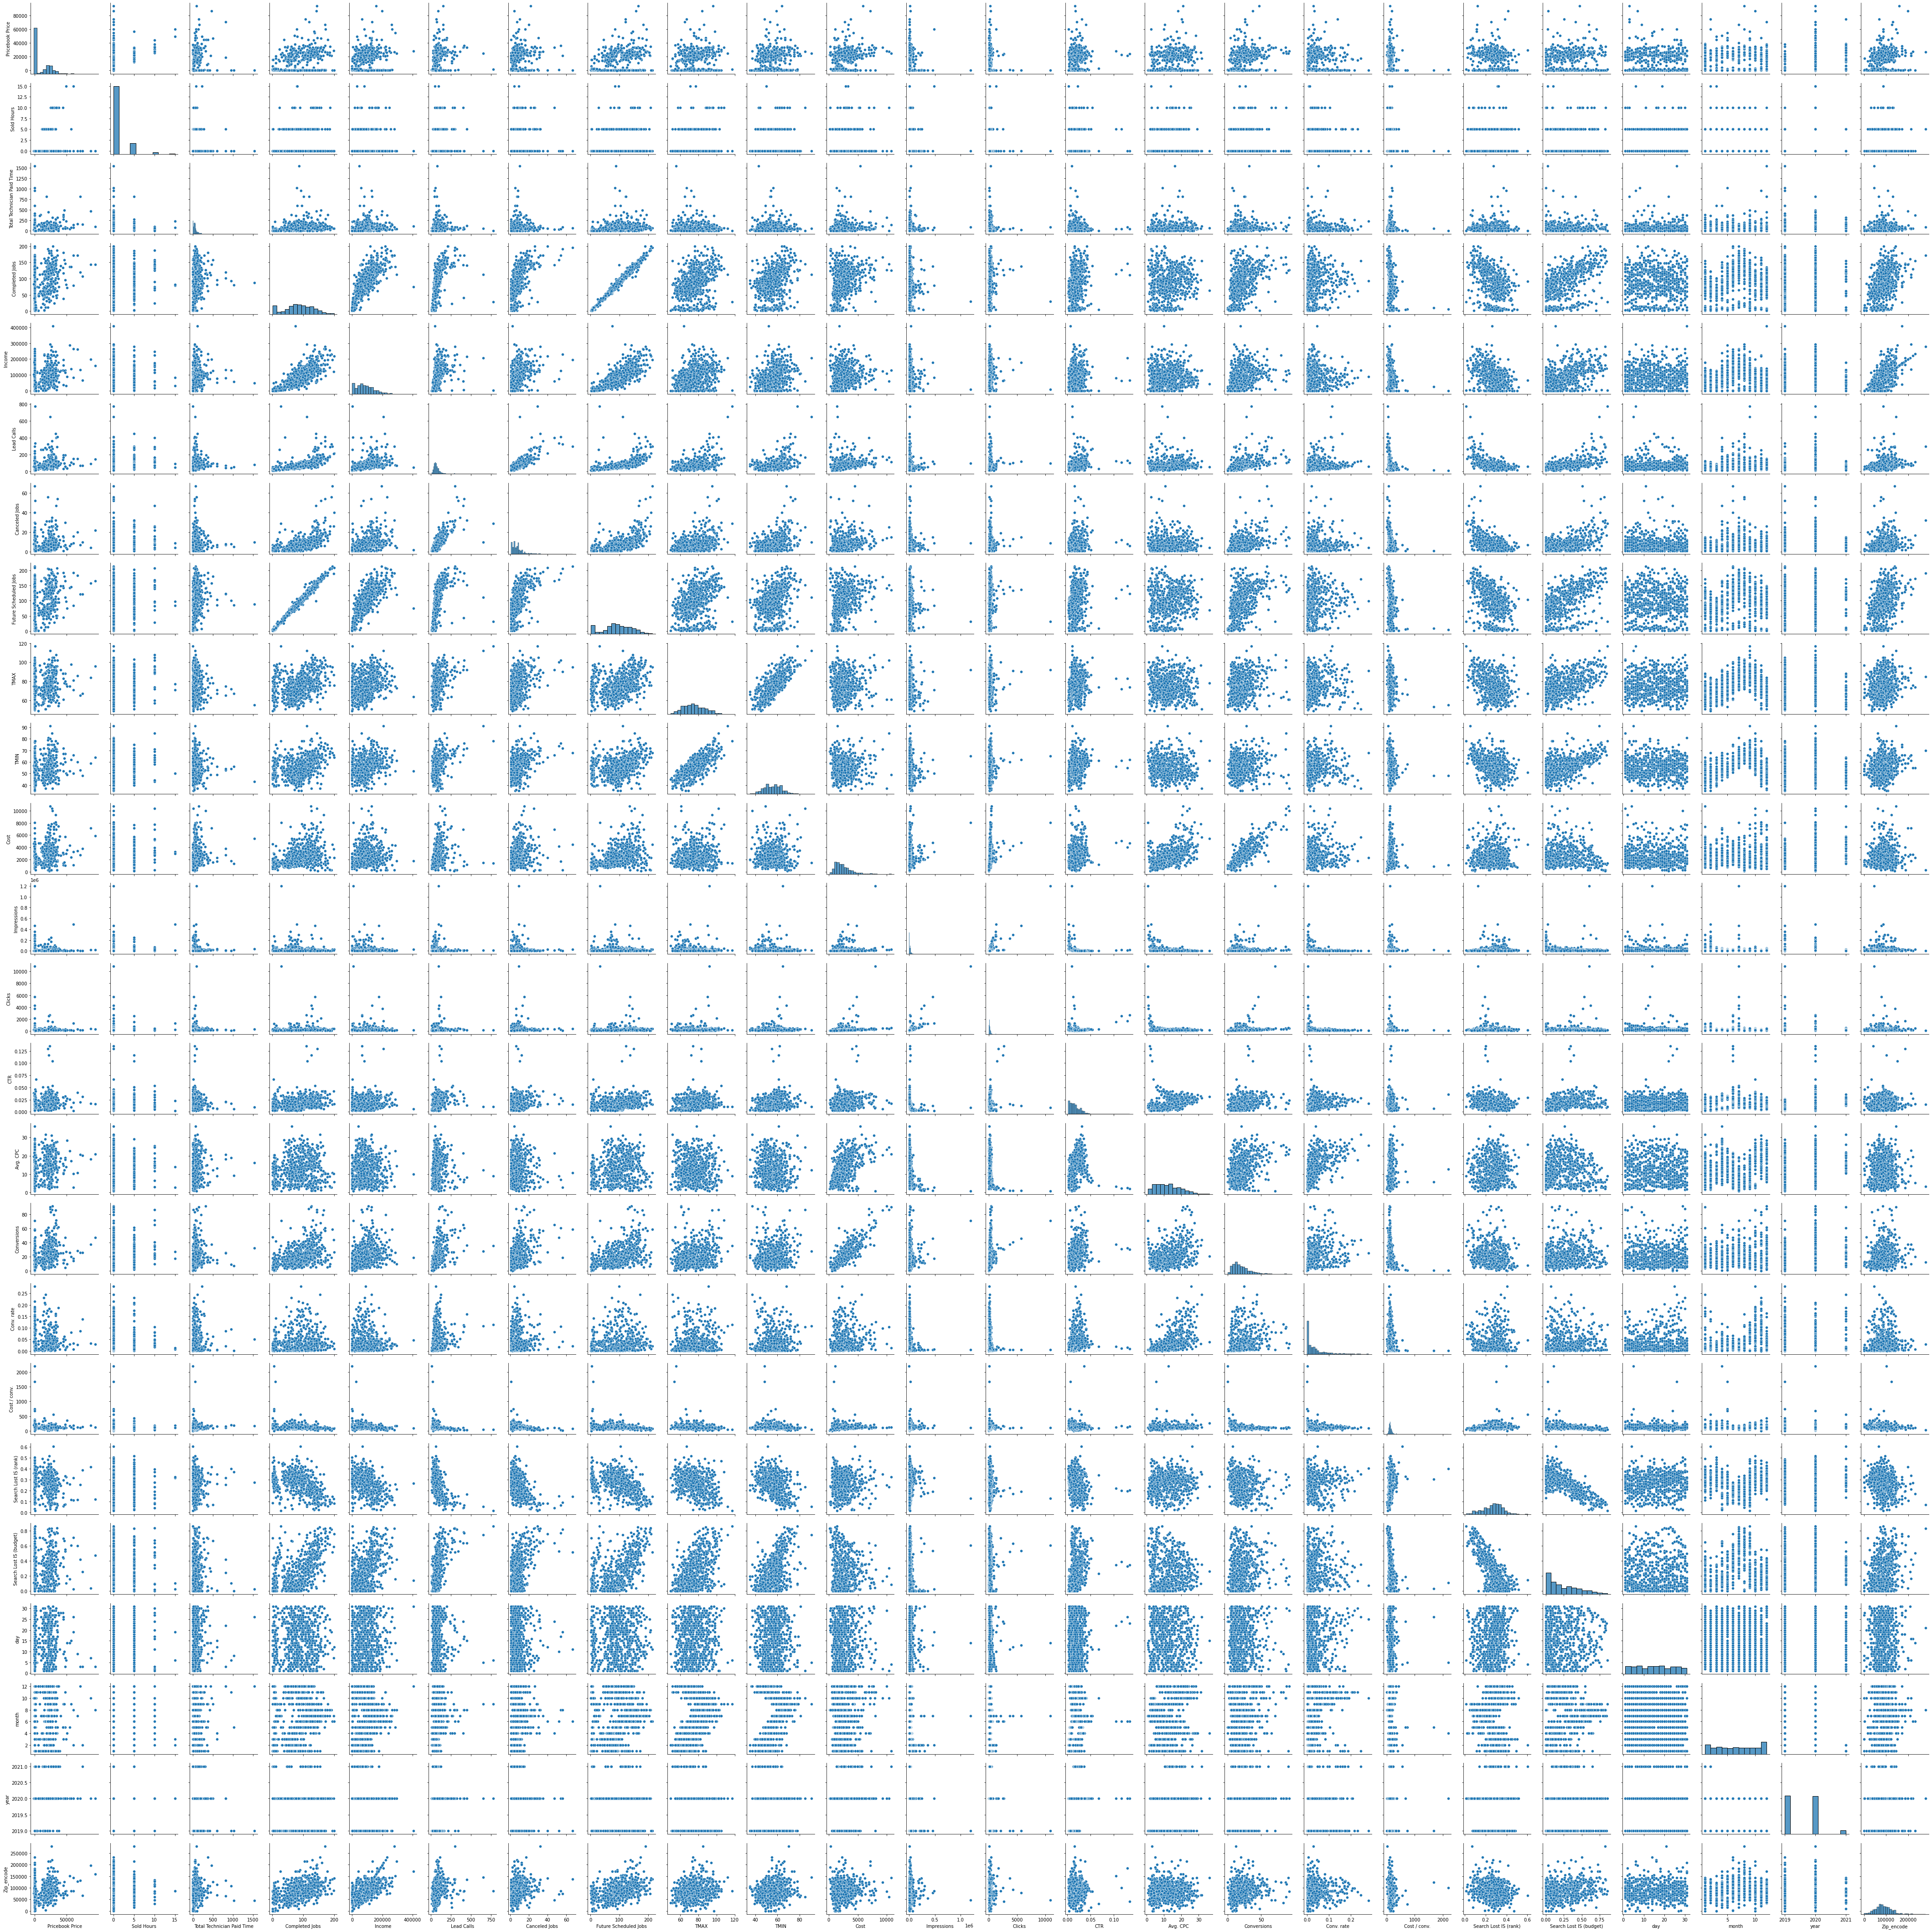

In [148]:
sns.pairplot(exp_1)

In [235]:
exp_1['county_name']=pd.get_dummies(exp_1['county_name'],drop_first = True)

In [236]:
exp_1['Day of week']=exp_1['Day of week'].replace('Monday',0)
exp_1['Day of week']=exp_1['Day of week'].replace('Tuesday',1)
exp_1['Day of week']=exp_1['Day of week'].replace('Wednesday',2)
exp_1['Day of week']=exp_1['Day of week'].replace('Thursday',3)
exp_1['Day of week']=exp_1['Day of week'].replace('Friday',4)
exp_1['Day of week']=exp_1['Day of week'].replace('Saturday',5)
exp_1['Day of week']=exp_1['Day of week'].replace('Sunday',6)

<AxesSubplot:>

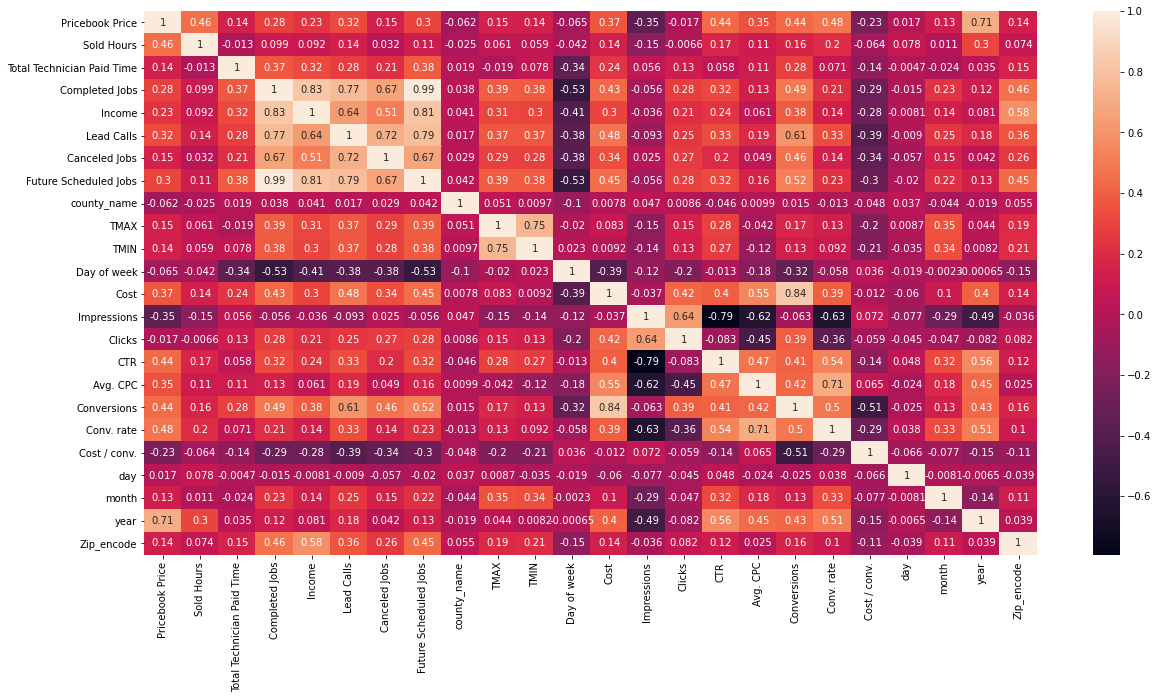

In [237]:
plt.figure(figsize=(20,10))
sns.heatmap(exp_1.corr(method='spearman'),annot=True)

In [238]:
exp_1.shape

(674, 27)

In [239]:
train=exp_1[0:570]
cv=exp_1[570:630]
test=exp_1[630:]

In [240]:
train.head()

Pricebook Price  Sold Hours  Total Technician Paid Time  Completed Jobs  \
0              0.0           0                    0.000000            90.0   
1              0.0           0                   16.949999            85.0   
2              0.0           0                  110.566664            82.0   
3              0.0           0                   11.516667            16.0   
4              0.0           0                  118.533333            89.0   

     Income  Lead Calls  Canceled Jobs  Future Scheduled Jobs  county_name  \
0  100885.0          83            5.0                   95.0            1   
1   25694.2          89            5.0                   94.0            1   
2   92705.0          53            7.0                   83.0            0   
3   14062.0          41            4.0                   21.0            1   
4  109814.0          87           13.0                   92.0            1   

   TMAX  ...  Conversions  Conv. rate  Cost / conv.  Search Impr. share  \
0    68  ...         10.1      0.1712        146.56              0.5233   
1    69  ...         22.0      0.0295         85.93              0.6041   
2    53  ...         29.5      0.0127         85.00              0.7161   
3    58  ...         16.5      0.0087         96.48              0.7447   
4    60  ...         23.5      0.0087        103.96              0.6444   

   Search Lost IS (rank)  Search Lost IS (budget)  day  month  year  \
0                  0.112                   0.3647    3      1  2019   
1                 0.2028                   0.1931    4      1  2019   
2                 0.1884                   0.0955    5      1  2019   
3                 0.2129                   0.0424    6      1  2019   
4                 0.2706                    0.085    7      1  2019   

      Zip_encode  
0  100885.000000  
1  106747.777500  
2   92705.000000  
3   41483.776667  
4  105166.175000  

[5 rows x 27 columns]

In [241]:
y_train=train['Income']
X_train=train.drop(['Income'],axis=1)

In [242]:
X_train['Search Impr. share']=X_train['Search Impr. share'].replace('<10%',0.09)

In [243]:
X_train['Search Impr. share']=X_train['Search Impr. share'].astype(float)
X_train['Search Lost IS (rank)']=X_train['Search Lost IS (rank)'].astype(float)
X_train['Search Lost IS (budget)']=X_train['Search Lost IS (budget)'].astype(float)

In [244]:
X_train.isnull().sum()

Pricebook Price                0
Sold Hours                     0
Total Technician Paid Time     0
Completed Jobs                 0
Lead Calls                     0
Canceled Jobs                 16
Future Scheduled Jobs          0
county_name                    0
TMAX                           0
TMIN                           0
Day of week                    0
Cost                           0
Impressions                    0
Clicks                         0
CTR                            0
Avg. CPC                       0
Conversions                    0
Conv. rate                     0
Cost / conv.                   0
Search Impr. share             0
Search Lost IS (rank)          0
Search Lost IS (budget)        0
day                            0
month                          0
year                           0
Zip_encode                     0
dtype: int64

In [245]:
X_train['Canceled Jobs'].median()

6.5

In [176]:
X_train['Canceled Jobs']=X_train['Canceled Jobs'].fillna(6.5)

In [177]:
y_train.isnull().sum()

0

In [178]:
from sklearn.ensemble import ExtraTreesRegressor
reg= ExtraTreesRegressor()

In [179]:
reg.fit(X_train,y_train)

ExtraTreesRegressor()

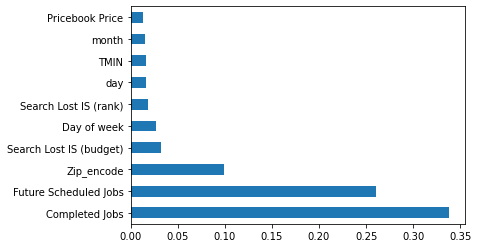

In [180]:
feat_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [181]:
from sklearn.linear_model import LinearRegression

In [182]:
reg_model=LinearRegression(normalize=True)
reg_model.fit(X_train,y_train)

LinearRegression(normalize=True)

In [183]:
reg_model.score(X_train,y_train)

0.7385859749620803

In [184]:
# cross validation

from sklearn.model_selection import cross_val_score
score=cross_val_score(reg_model,X_train,y_train,cv=5)

In [185]:
score.mean()

0.3823403090261849

In [186]:
slope=pd.DataFrame(reg_model.coef_,X_train.columns,columns=["Slope"])

In [187]:
slope

Slope
Pricebook Price                  0.329878
Sold Hours                    -970.476077
Total Technician Paid Time      -7.042712
Completed Jobs                1288.388751
Lead Calls                     -22.353206
Canceled Jobs                 -665.193320
Future Scheduled Jobs         -204.855711
county_name                   2343.977627
TMAX                            -7.292855
TMIN                          -400.246005
Day of week                   1052.947781
Cost                           -11.269218
Impressions                     -0.014176
Clicks                           4.815188
CTR                         -32653.126193
Avg. CPC                       639.351711
Conversions                    778.177909
Conv. rate                 -148407.594363
Cost / conv.                    -9.238566
Search Impr. share          -81458.534387
Search Lost IS (rank)      -168121.375839
Search Lost IS (budget)    -110564.505605
day                            227.308203
month                         1215.267638
year                          7141.136789
Zip_encode                       0.469354

In [188]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [189]:
# Intializig ridge model
reg_model_1=Ridge()

In [190]:
# lamda parameter range 

hyperparameter_range={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]}

In [191]:
# Searching best hyperparameter using gridsearch 

ridge_reg=GridSearchCV(reg_model_1,hyperparameter_range,scoring='neg_mean_absolute_error',cv=5)
ridge_reg.fit(X_train,y_train)

C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.69138e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.03906e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.17986e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.82741e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.98066e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\linear_mo

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75,
                                   80, 85, 90, 95, 100]},
             scoring='neg_mean_absolute_error')

In [192]:
# Best lamda
ridge_reg.best_params_

{'alpha': 100}

In [193]:
ridge_reg.best_score_

-26683.233411724766

In [194]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
parameters={'alpha':randint(1e-8,100)}


In [195]:
ridge_reg_1=RandomizedSearchCV(reg_model_1,parameters,scoring='neg_mean_absolute_error',cv=5)
ridge_reg_1.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=Ridge(),
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026944677470>},
                   scoring='neg_mean_absolute_error')

In [196]:
ridge_reg_1.best_score_

-26692.101245860955

In [197]:
ridge_reg_1.best_params_


{'alpha': 92}

In [198]:
reg_model_1=Ridge(alpha=96)

In [199]:
reg_model_1.fit(X_train,y_train)

Ridge(alpha=96)

In [200]:
reg_model.score(X_train,y_train)

0.7385859749620803

In [201]:
from sklearn.linear_model import Lasso


In [202]:
reg_model_2=Lasso()

In [203]:
# hyper parameter range 
hyperparameters_range={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]}

In [204]:
# Searching best hyper parameter 

lasso_reg=GridSearchCV(reg_model_2,hyperparameters_range,scoring='neg_mean_absolute_error',cv=5)

lasso_reg.fit(X_train,y_train)

C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 251028070426.8298, tolerance: 205534535.02173674
  positive)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 238609580966.95166, tolerance: 176573774.51430824
  positive)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 221738465713.90207, tolerance: 189244546.22350237
  positive)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4682535535.048828, tolerance: 205534535.02173674
  positive)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3760928561.5856323, tolerance: 205534535.02173674
  positive)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3093995158.791626, tolerance: 205534535.02173674
  positive)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75,
                                   80, 85, 90, 95, 100]},
             scoring='neg_mean_absolute_error')

In [205]:
lasso_reg.best_params_

{'alpha': 30}

In [206]:
lasso_reg.best_score_

-26916.651526550886

In [207]:
X_train.head()

Pricebook Price  Sold Hours  Total Technician Paid Time  Completed Jobs  \
0              0.0           0                    0.000000            90.0   
1              0.0           0                   16.949999            85.0   
2              0.0           0                  110.566664            82.0   
3              0.0           0                   11.516667            16.0   
4              0.0           0                  118.533333            89.0   

   Lead Calls  Canceled Jobs  Future Scheduled Jobs  county_name  TMAX  TMIN  \
0          83            5.0                   95.0            0    68  49.0   
1          89            5.0                   94.0            0    69  35.0   
2          53            7.0                   83.0            1    53  44.0   
3          41            4.0                   21.0            0    58  47.0   
4          87           13.0                   92.0            0    60  50.0   

   ...  Conversions  Conv. rate  Cost / conv.  Search Impr. share  \
0  ...         10.1      0.1712        146.56              0.5233   
1  ...         22.0      0.0295         85.93              0.6041   
2  ...         29.5      0.0127         85.00              0.7161   
3  ...         16.5      0.0087         96.48              0.7447   
4  ...         23.5      0.0087        103.96              0.6444   

   Search Lost IS (rank)  Search Lost IS (budget)  day  month  year  \
0                 0.1120                   0.3647    3      1  2019   
1                 0.2028                   0.1931    4      1  2019   
2                 0.1884                   0.0955    5      1  2019   
3                 0.2129                   0.0424    6      1  2019   
4                 0.2706                   0.0850    7      1  2019   

      Zip_encode  
0  100885.000000  
1  106747.777500  
2   92705.000000  
3   41483.776667  
4  105166.175000  

[5 rows x 26 columns]

In [208]:
X_train.columns

Index(['Pricebook Price', 'Sold Hours', 'Total Technician Paid Time',
       'Completed Jobs', 'Lead Calls', 'Canceled Jobs',
       'Future Scheduled Jobs', 'county_name', 'TMAX', 'TMIN', 'Day of week',
       'Cost', 'Impressions', 'Clicks', 'CTR', 'Avg. CPC', 'Conversions',
       'Conv. rate', 'Cost / conv.', 'Search Impr. share',
       'Search Lost IS (rank)', 'Search Lost IS (budget)', 'day', 'month',
       'year', 'Zip_encode'],
      dtype='object')

In [209]:
X_1=X_train.drop(['Conversions'],axis=1)

In [210]:
lasso_reg.fit(X_1,y_train)

C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 256198089592.72742, tolerance: 205534535.02173674
  positive)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 239557328890.72226, tolerance: 176573774.51430824
  positive)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 223316494988.12982, tolerance: 189244546.22350237
  positive)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75,
                                   80, 85, 90, 95, 100]},
             scoring='neg_mean_absolute_error')

In [211]:
lasso_reg.best_score_

-27000.986033942794

In [212]:
from sklearn.neighbors import KNeighborsRegressor

In [213]:
# applying KNN algoritham with K=1(worst case)
reg_model=KNeighborsRegressor(n_neighbors=5)
reg_model.fit(X_train,y_train)

KNeighborsRegressor()

In [214]:
reg_model.score(X_train,y_train)

0.5437196587908439

# Tree Based models

In [215]:
from sklearn.ensemble import RandomForestRegressor



In [216]:
random_forest_reg=RandomForestRegressor()

In [217]:
random_forest_reg.fit(X_train,y_train)

RandomForestRegressor()

In [218]:
random_forest_reg.score(X_train,y_train)

0.9551775920407863

In [219]:
# cross validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(random_forest_reg,X_train,y_train,cv=5)

In [220]:
score.mean()

0.509960651526309

In [221]:
from sklearn.model_selection import RandomizedSearchCV


In [244]:
# Hyparameter ranges 

from scipy.stats import randint


parameters = {'n_estimators': randint(100,1200),
               'max_features': ['auto','sqrt'],
               'max_depth': randint(5,40),
               'min_samples_split': randint(2,30),
               'min_samples_leaf': randint(1,10)  }


In [245]:
base_learner=RandomForestRegressor()


In [246]:
tuned_model= RandomizedSearchCV(estimator = base_learner, param_distributions = parameters,scoring='neg_mean_absolute_error', n_iter = 100, cv = 5, verbose=2)

In [247]:
tuned_model.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] max_depth=26, max_features=auto, min_samples_leaf=2, min_samples_split=25, n_estimators=701 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=26, max_features=auto, min_samples_leaf=2, min_samples_split=25, n_estimators=701, total=   3.6s
[CV] max_depth=26, max_features=auto, min_samples_leaf=2, min_samples_split=25, n_estimators=701 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


[CV]  max_depth=26, max_features=auto, min_samples_leaf=2, min_samples_split=25, n_estimators=701, total=   3.2s
[CV] max_depth=26, max_features=auto, min_samples_leaf=2, min_samples_split=25, n_estimators=701 
[CV]  max_depth=26, max_features=auto, min_samples_leaf=2, min_samples_split=25, n_estimators=701, total=   3.0s
[CV] max_depth=26, max_features=auto, min_samples_leaf=2, min_samples_split=25, n_estimators=701 
[CV]  max_depth=26, max_features=auto, min_samples_leaf=2, min_samples_split=25, n_estimators=701, total=   2.9s
[CV] max_depth=26, max_features=auto, min_samples_leaf=2, min_samples_split=25, n_estimators=701 
[CV]  max_depth=26, max_features=auto, min_samples_leaf=2, min_samples_split=25, n_estimators=701, total=   3.0s
[CV] max_depth=35, max_features=sqrt, min_samples_leaf=5, min_samples_split=27, n_estimators=482 
[CV]  max_depth=35, max_features=sqrt, min_samples_leaf=5, min_samples_split=27, n_estimators=482, total=   1.1s
[CV] max_depth=35, max_features=sqrt, min_s

[CV]  max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=482, total=   1.1s
[CV] max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=482 
[CV]  max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=482, total=   1.0s
[CV] max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=482 
[CV]  max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=482, total=   1.0s
[CV] max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=482 
[CV]  max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=482, total=   1.0s
[CV] max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=482 
[CV]  max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=482, total=   1.0s
[CV] max_depth=39, max_features=sqrt, min_samples_leaf=3, min

[CV]  max_depth=26, max_features=sqrt, min_samples_leaf=8, min_samples_split=9, n_estimators=1099, total=   2.9s
[CV] max_depth=12, max_features=auto, min_samples_leaf=5, min_samples_split=26, n_estimators=531 
[CV]  max_depth=12, max_features=auto, min_samples_leaf=5, min_samples_split=26, n_estimators=531, total=   2.4s
[CV] max_depth=12, max_features=auto, min_samples_leaf=5, min_samples_split=26, n_estimators=531 
[CV]  max_depth=12, max_features=auto, min_samples_leaf=5, min_samples_split=26, n_estimators=531, total=   2.3s
[CV] max_depth=12, max_features=auto, min_samples_leaf=5, min_samples_split=26, n_estimators=531 
[CV]  max_depth=12, max_features=auto, min_samples_leaf=5, min_samples_split=26, n_estimators=531, total=   2.3s
[CV] max_depth=12, max_features=auto, min_samples_leaf=5, min_samples_split=26, n_estimators=531 
[CV]  max_depth=12, max_features=auto, min_samples_leaf=5, min_samples_split=26, n_estimators=531, total=   2.4s
[CV] max_depth=12, max_features=auto, min_s

[CV]  max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=11, n_estimators=452, total=   2.2s
[CV] max_depth=27, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=478 
[CV]  max_depth=27, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=478, total=   3.7s
[CV] max_depth=27, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=478 
[CV]  max_depth=27, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=478, total=   3.2s
[CV] max_depth=27, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=478 
[CV]  max_depth=27, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=478, total=   2.7s
[CV] max_depth=27, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=478 
[CV]  max_depth=27, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=478, total=   2.5s
[CV] max_depth=27, max_features=auto, min_samples_le

[CV]  max_depth=31, max_features=auto, min_samples_leaf=8, min_samples_split=19, n_estimators=760, total=   2.9s
[CV] max_depth=31, max_features=auto, min_samples_leaf=8, min_samples_split=19, n_estimators=760 
[CV]  max_depth=31, max_features=auto, min_samples_leaf=8, min_samples_split=19, n_estimators=760, total=   3.1s
[CV] max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=19, n_estimators=234 
[CV]  max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=19, n_estimators=234, total=   1.2s
[CV] max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=19, n_estimators=234 
[CV]  max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=19, n_estimators=234, total=   1.1s
[CV] max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=19, n_estimators=234 
[CV]  max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=19, n_estimators=234, total=   0.8s
[CV] max_depth=8, max_features=auto, min_samples_

[CV]  max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=857, total=   1.7s
[CV] max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=857 
[CV]  max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=25, n_estimators=857, total=   2.0s
[CV] max_depth=27, max_features=sqrt, min_samples_leaf=1, min_samples_split=11, n_estimators=562 
[CV]  max_depth=27, max_features=sqrt, min_samples_leaf=1, min_samples_split=11, n_estimators=562, total=   1.4s
[CV] max_depth=27, max_features=sqrt, min_samples_leaf=1, min_samples_split=11, n_estimators=562 
[CV]  max_depth=27, max_features=sqrt, min_samples_leaf=1, min_samples_split=11, n_estimators=562, total=   1.4s
[CV] max_depth=27, max_features=sqrt, min_samples_leaf=1, min_samples_split=11, n_estimators=562 
[CV]  max_depth=27, max_features=sqrt, min_samples_leaf=1, min_samples_split=11, n_estimators=562, total=   1.4s
[CV] max_depth=27, max_features=sqrt, min_s

[CV]  max_depth=32, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=326, total=   1.7s
[CV] max_depth=32, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=326 
[CV]  max_depth=32, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=326, total=   1.6s
[CV] max_depth=32, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=326 
[CV]  max_depth=32, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=326, total=   1.4s
[CV] max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=22, n_estimators=484 
[CV]  max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=22, n_estimators=484, total=   1.0s
[CV] max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=22, n_estimators=484 
[CV]  max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=22, n_estimators=484, total=   1.0s
[CV] max_depth=8, max_features=sqrt, min_sample

[CV]  max_depth=39, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=619, total=   2.3s
[CV] max_depth=39, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=619 
[CV]  max_depth=39, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=619, total=   2.2s
[CV] max_depth=39, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=619 
[CV]  max_depth=39, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=619, total=   2.3s
[CV] max_depth=39, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=619 
[CV]  max_depth=39, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=619, total=   2.3s
[CV] max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=1041 
[CV]  max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=1041, total=   4.4s
[CV] max_depth=35, max_features=auto, min

[CV]  max_depth=19, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=429, total=   0.9s
[CV] max_depth=19, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=429 
[CV]  max_depth=19, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=429, total=   0.9s
[CV] max_depth=19, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=429 
[CV]  max_depth=19, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=429, total=   0.9s
[CV] max_depth=19, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=429 
[CV]  max_depth=19, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=429, total=   1.0s
[CV] max_depth=19, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=429 
[CV]  max_depth=19, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=429, total=   1.0s
[CV] max_depth=13, max_features=auto, min_s

[CV]  max_depth=11, max_features=sqrt, min_samples_leaf=7, min_samples_split=27, n_estimators=438, total=   1.4s
[CV] max_depth=22, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=806 
[CV]  max_depth=22, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=806, total=   2.4s
[CV] max_depth=22, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=806 
[CV]  max_depth=22, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=806, total=   2.0s
[CV] max_depth=22, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=806 
[CV]  max_depth=22, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=806, total=   2.0s
[CV] max_depth=22, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=806 
[CV]  max_depth=22, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=806, total=   2.2s
[CV] max_depth=22, max_features=sqrt, min_samples_l

[CV]  max_depth=26, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=348, total=   0.9s
[CV] max_depth=26, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=348 
[CV]  max_depth=26, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=348, total=   1.2s
[CV] max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=24, n_estimators=357 
[CV]  max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=24, n_estimators=357, total=   2.3s
[CV] max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=24, n_estimators=357 
[CV]  max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=24, n_estimators=357, total=   2.3s
[CV] max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=24, n_estimators=357 
[CV]  max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=24, n_estimators=357, total=   1.9s
[CV] max_depth=28, max_features=auto, min_s

[CV]  max_depth=7, max_features=sqrt, min_samples_leaf=9, min_samples_split=11, n_estimators=1150, total=   2.5s
[CV] max_depth=7, max_features=sqrt, min_samples_leaf=9, min_samples_split=11, n_estimators=1150 
[CV]  max_depth=7, max_features=sqrt, min_samples_leaf=9, min_samples_split=11, n_estimators=1150, total=   2.4s
[CV] max_depth=7, max_features=sqrt, min_samples_leaf=9, min_samples_split=11, n_estimators=1150 
[CV]  max_depth=7, max_features=sqrt, min_samples_leaf=9, min_samples_split=11, n_estimators=1150, total=   2.8s
[CV] max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=336 
[CV]  max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=336, total=   0.9s
[CV] max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=336 
[CV]  max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=336, total=   0.9s
[CV] max_depth=13, max_features=sqrt, min_sampl

[CV]  max_depth=39, max_features=sqrt, min_samples_leaf=6, min_samples_split=24, n_estimators=1078, total=   4.3s
[CV] max_depth=39, max_features=sqrt, min_samples_leaf=6, min_samples_split=24, n_estimators=1078 
[CV]  max_depth=39, max_features=sqrt, min_samples_leaf=6, min_samples_split=24, n_estimators=1078, total=   3.9s
[CV] max_depth=39, max_features=sqrt, min_samples_leaf=6, min_samples_split=24, n_estimators=1078 
[CV]  max_depth=39, max_features=sqrt, min_samples_leaf=6, min_samples_split=24, n_estimators=1078, total=   3.1s
[CV] max_depth=36, max_features=auto, min_samples_leaf=2, min_samples_split=29, n_estimators=433 
[CV]  max_depth=36, max_features=auto, min_samples_leaf=2, min_samples_split=29, n_estimators=433, total=   2.1s
[CV] max_depth=36, max_features=auto, min_samples_leaf=2, min_samples_split=29, n_estimators=433 
[CV]  max_depth=36, max_features=auto, min_samples_leaf=2, min_samples_split=29, n_estimators=433, total=   2.6s
[CV] max_depth=36, max_features=auto, 

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 19.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000207094DD2E8>,
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000207094DD470>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000207094DD1D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000207094DDE48>},
                   scoring='neg_mean_absolute_error', verbose=2)

In [248]:
tuned_model.best_params_

{'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 29,
 'n_estimators': 698}

In [249]:
tuned_model.best_score_

-25916.71341687184

In [251]:
random_forest_reg_1=RandomForestRegressor(max_depth= 9,
 max_features='auto',
 min_samples_leaf= 3,
 min_samples_split=29,
 n_estimators=698)

In [252]:
random_forest_reg_1.fit(X_train,y_train)

RandomForestRegressor(max_depth=9, min_samples_leaf=3, min_samples_split=29,
                      n_estimators=698)

In [253]:
random_forest_reg_1.score(X_train,y_train)

0.8289649870224185

In [254]:
cv.head()

Pricebook Price  Sold Hours  Total Technician Paid Time  Completed Jobs  \
570          20782.0           0                   38.050000            12.0   
571          30620.5           0                   54.183333           127.0   
572          87340.0           0                  465.583325           143.0   
573          23213.0           5                   57.750000            79.0   
574          14495.0           0                   15.900000            54.0   

        Income  Lead Calls  Canceled Jobs  Future Scheduled Jobs  county_name  \
570   15274.00          66            7.0                   13.0            1   
571  137589.64          90           10.0                  141.0            0   
572  197808.55          92            4.0                  157.0            1   
573   21892.41          63            5.0                  107.0            0   
574   78196.40          49            2.0                   52.0            0   

     TMAX  ...  Conversions  Conv. rate  Cost / conv.  Search Impr. share  \
570    96  ...        42.10      0.0814        101.18              0.4446   
571    95  ...        62.70      0.0521        126.69              0.5747   
572    84  ...        37.65      0.0327        189.03              0.5513   
573    72  ...        37.50      0.0371        141.70              0.4626   
574    78  ...         9.90      0.0185        145.71              0.3532   

     Search Lost IS (rank)  Search Lost IS (budget)  day  month  year  \
570                 0.2618                   0.2936    4     10  2020   
571                 0.3864                    0.039    6     10  2020   
572                 0.4147                    0.034    7     10  2020   
573                 0.5169                   0.0206    9     10  2020   
574                 0.2762                   0.3706   10     10  2020   

        Zip_encode  
570   78124.961667  
571   96350.745000  
572  197808.550000  
573   95731.350000  
574   78196.400000  

[5 rows x 27 columns]

In [255]:
y_cv=cv['Income']
X_cv=cv.drop(['Income'],axis=1)

In [256]:
X_cv.isnull().sum()

Pricebook Price               0
Sold Hours                    0
Total Technician Paid Time    0
Completed Jobs                2
Lead Calls                    0
Canceled Jobs                 5
Future Scheduled Jobs         0
county_name                   0
TMAX                          0
TMIN                          0
Day of week                   0
Cost                          0
Impressions                   0
Clicks                        0
CTR                           0
Avg. CPC                      0
Conversions                   0
Conv. rate                    0
Cost / conv.                  0
Search Impr. share            0
Search Lost IS (rank)         0
Search Lost IS (budget)       0
day                           0
month                         0
year                          0
Zip_encode                    0
dtype: int64

In [257]:
X_cv['Completed Jobs'].median()

105.5

In [258]:
X_cv['Completed Jobs']=X_cv['Completed Jobs'].fillna(105.5)

In [259]:
y_cv.isnull().sum()


2

In [260]:
y_cv.median()

84432.195

In [261]:
y_cv=y_cv.fillna(84432.195)

In [264]:
X_cv['Canceled Jobs'].median()

8.0

In [265]:
X_cv['Canceled Jobs']=X_cv['Canceled Jobs'].fillna(8.0)

In [268]:
pre=random_forest_reg_1.predict(X_cv)

In [269]:
print('MAE:', metrics.mean_absolute_error(y_cv, pre))

MAE: 29252.303245309406


In [270]:
test.head()

Pricebook Price  Sold Hours  Total Technician Paid Time  Completed Jobs  \
630          22975.0           0                   56.866667           108.0   
631          28722.0           0                  109.716665           118.0   
632          23229.0           0                   76.016667           116.0   
633          21484.0           5                   59.016667            53.0   
634           1746.4           0                    1.983333             1.0   

        Income  Lead Calls  Canceled Jobs  Future Scheduled Jobs  county_name  \
630   73107.94          98            9.0                  124.0            0   
631  100335.70          79            5.0                  125.0            1   
632   82920.44          66           11.0                  124.0            0   
633   36992.00          72            1.0                   55.0            0   
634     326.00          56            4.0                    2.0            0   

     TMAX  ...  Conversions  Conv. rate  Cost / conv.  Search Impr. share  \
630    74  ...        42.30      0.0573         78.55              0.3923   
631    64  ...        27.00      0.0358        112.68              0.3918   
632    65  ...        38.90      0.0531         95.93              0.4147   
633    72  ...        32.11      0.0449         72.29              0.4578   
634    84  ...        18.00      0.0254        120.92               0.476   

     Search Lost IS (rank)  Search Lost IS (budget)  day  month  year  \
630                 0.3045                   0.3032   16     12  2020   
631                 0.3365                   0.2717   17     12  2020   
632                 0.3354                   0.2499   18     12  2020   
633                 0.3504                   0.1918   19     12  2020   
634                 0.3584                   0.1656   20     12  2020   

       Zip_encode  
630  96180.285000  
631  76112.750909  
632  82920.440000  
633  36992.000000  
634  37153.687500  

[5 rows x 27 columns]

In [271]:
y_test=test['Income']
X_test=test.drop(['Income'],axis=1)

In [272]:
X_test.isnull().sum()

Pricebook Price               0
Sold Hours                    0
Total Technician Paid Time    0
Completed Jobs                0
Lead Calls                    0
Canceled Jobs                 0
Future Scheduled Jobs         0
county_name                   0
TMAX                          0
TMIN                          0
Day of week                   0
Cost                          0
Impressions                   0
Clicks                        0
CTR                           0
Avg. CPC                      0
Conversions                   0
Conv. rate                    0
Cost / conv.                  0
Search Impr. share            0
Search Lost IS (rank)         0
Search Lost IS (budget)       0
day                           0
month                         0
year                          0
Zip_encode                    0
dtype: int64

In [274]:
y_test.isnull().sum()

0

In [275]:
pre_1=random_forest_reg_1.predict(X_test)

In [277]:
random_forest_reg_1.score(X_test,y_test)

0.2958395384575051

In [286]:
from sklearn import metrics

In [287]:
from sklearn.metrics import mean_absolute_percentage_error

ImportError: cannot import name 'mean_absolute_percentage_error' from 'sklearn.metrics' (C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [288]:
exp_1.head()

Pricebook Price  Sold Hours  Total Technician Paid Time  Completed Jobs  \
0              0.0           0                    0.000000            90.0   
1              0.0           0                   16.949999            85.0   
2              0.0           0                  110.566664            82.0   
3              0.0           0                   11.516667            16.0   
4              0.0           0                  118.533333            89.0   

     Income  Lead Calls  Canceled Jobs  Future Scheduled Jobs  county_name  \
0  100885.0          83            5.0                   95.0            0   
1   25694.2          89            5.0                   94.0            0   
2   92705.0          53            7.0                   83.0            1   
3   14062.0          41            4.0                   21.0            0   
4  109814.0          87           13.0                   92.0            0   

   TMAX  ...  Conversions  Conv. rate  Cost / conv.  Search Impr. share  \
0    68  ...         10.1      0.1712        146.56              0.5233   
1    69  ...         22.0      0.0295         85.93              0.6041   
2    53  ...         29.5      0.0127         85.00              0.7161   
3    58  ...         16.5      0.0087         96.48              0.7447   
4    60  ...         23.5      0.0087        103.96              0.6444   

   Search Lost IS (rank)  Search Lost IS (budget)  day  month  year  \
0                  0.112                   0.3647    3      1  2019   
1                 0.2028                   0.1931    4      1  2019   
2                 0.1884                   0.0955    5      1  2019   
3                 0.2129                   0.0424    6      1  2019   
4                 0.2706                    0.085    7      1  2019   

      Zip_encode  
0  100885.000000  
1  106747.777500  
2   92705.000000  
3   41483.776667  
4  105166.175000  

[5 rows x 27 columns]

In [289]:
exp_1.shape

(674, 27)

In [290]:
exp_1.to_excel('all_feat.xlsx',index=False)